In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
train = pd.read_csv(r"./Data/Result.csv")

In [2]:
def Min_Max_Normalization(feature):
    Data_max = max(feature)
    Data_min = min(feature)
    return (feature-Data_min)/(Data_max-Data_min)

def Plot_confusion(y_true, y_pred):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()

In [3]:
train['Administrative'] = Min_Max_Normalization(train['Administrative'])
train['Administrative_Duration'] = Min_Max_Normalization(train['Administrative_Duration'])
train['Informational'] = Min_Max_Normalization(train['Informational'])
train['Informational_Duration'] = Min_Max_Normalization(train['Informational_Duration'])
train['ProductRelated'] = Min_Max_Normalization(train['ProductRelated'])
train['ProductRelated_Duration'] = Min_Max_Normalization(train['ProductRelated_Duration'])

In [4]:
train = train.astype({
    "Month":'int',
    "OperatingSystems":'int',
    "Browser":'int',
    "Region":'int',
    "TrafficType":'int',
    "VisitorType":'int',
    "Weekend":'int',
    "Revenue":'bool'
})
train = train.drop(['ID'],axis=1)
Data = train.drop(["Revenue"], axis=1)
Target = train['Revenue']
X_train, X_test, y_train, y_test = train_test_split(Data, Target,test_size=0.2,random_state=0)

In [5]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
7350,0.148148,0.014505,0.000000,0.000000,0.012766,5.034673e-07,0.018182,0.036364,0.0,0.0,3,3,3,6,12,2,0
3791,0.037037,0.006179,0.000000,0.000000,0.043972,1.678224e-06,0.006897,0.010345,0.0,0.0,2,1,10,0,7,1,0
7268,0.000000,0.000000,0.000000,0.000000,0.041135,1.311262e-06,0.000000,0.002469,0.0,0.0,9,5,10,1,4,2,1
1129,0.185185,0.022262,0.000000,0.000000,0.005674,6.375912e-08,0.000000,0.056481,0.0,0.0,7,1,7,3,4,2,0
4823,0.111111,0.016035,0.083333,0.002746,0.004255,4.081688e-08,0.066667,0.066667,0.0,0.0,9,3,3,0,11,2,0


<H1>RandomForestClassifier

Test Accuracy 0.881408276714021
Test Recall 0.43703703703703706


C:\Users\Ray\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


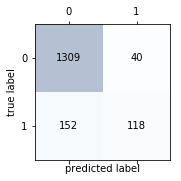

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Test Accuracy", rfc.score(X_test, y_test))
print("Test Recall", metrics.recall_score(y_test, rfc_pred))

#Test Data
Plot_confusion(y_test, rfc_pred)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 18 columns):
Administrative             8093 non-null float64
Administrative_Duration    8093 non-null float64
Informational              8093 non-null float64
Informational_Duration     8093 non-null float64
ProductRelated             8093 non-null float64
ProductRelated_Duration    8093 non-null float64
BounceRates                8093 non-null float64
ExitRates                  8093 non-null float64
PageValues                 8093 non-null float64
SpecialDay                 8093 non-null float64
Month                      8093 non-null int32
OperatingSystems           8093 non-null int32
Browser                    8093 non-null int32
Region                     8093 non-null int32
TrafficType                8093 non-null int32
VisitorType                8093 non-null int32
Weekend                    8093 non-null int32
Revenue                    8093 non-null bool
dtypes: bool(1), float64(10)

<H1>XGBClassifier

[20:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Ray\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Test Accuracy 0.8968499073502162
Test Recall 0.5703703703703704


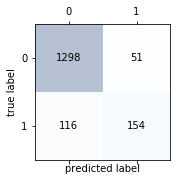

In [8]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
xgbc_pred = xgbc.predict(X_test)
print("Test Accuracy", accuracy_score(y_test, xgbc_pred))
print("Test Recall", metrics.recall_score(y_test, xgbc_pred))

#Test Data
Plot_confusion(y_test, xgbc_pred)

<H1>XGBClassifier param

In [9]:
from xgboost import XGBClassifier
acc = []
rec = []
for s in range(1,11):
    print("+++++++s=",s,"++++++")
    for c in range(1,11):
        print("-----c=",c,"-----")
        for m in range(2,10):
            for l in range(1,11):
                print("m=",m,"c=",c,"s=",s,'l=',l)
                xgb2 = XGBClassifier(
                    learning_rate=l/10, 
                    max_depth=m, 
                    subsample=s/10,
                    colsample_bytree=c/10,
                    objective='binary:logistic',
                    eval_metric='error'
                )
                xgb2.fit(X_train,y_train)
                y_pred=xgb2.predict(X_test)
                acc.append(accuracy_score(y_test, y_pred))
                rec.append(metrics.recall_score(y_test, y_pred))
                print("Acc.",accuracy_score(y_test, y_pred))
                print("Rec.",metrics.recall_score(y_test, y_pred))

+++++++s= 1 ++++++
-----c= 1 -----
m= 2 c= 1 s= 1 l= 1
Acc. 0.8468190240889438
Rec. 0.12962962962962962
m= 2 c= 1 s= 1 l= 2
Acc. 0.8739962940086473
Rec. 0.37037037037037035
m= 2 c= 1 s= 1 l= 3
Acc. 0.8838789376158123
Rec. 0.45925925925925926
m= 2 c= 1 s= 1 l= 4
Acc. 0.887584928968499
Rec. 0.4925925925925926
m= 2 c= 1 s= 1 l= 5
Acc. 0.8925262507720816
Rec. 0.5185185185185185
m= 2 c= 1 s= 1 l= 6
Acc. 0.8863495985176034
Rec. 0.5111111111111111
m= 2 c= 1 s= 1 l= 7
Acc. 0.8764669549104386
Rec. 0.48148148148148145
m= 2 c= 1 s= 1 l= 8
Acc. 0.8777022853613342
Rec. 0.5
m= 2 c= 1 s= 1 l= 9
Acc. 0.8758492896849908
Rec. 0.5481481481481482
m= 2 c= 1 s= 1 l= 10
Acc. 0.8628783199505868
Rec. 0.5074074074074074
m= 3 c= 1 s= 1 l= 1
Acc. 0.8499073502161828
Rec. 0.14814814814814814
m= 3 c= 1 s= 1 l= 2
Acc. 0.875231624459543
Rec. 0.37037037037037035
m= 3 c= 1 s= 1 l= 3
Acc. 0.8844966028412601
Rec. 0.45185185185185184
m= 3 c= 1 s= 1 l= 4
Acc. 0.8826436071649166
Rec. 0.4703703703703704
m= 3 c= 1 s= 1 l= 5
Ac

Acc. 0.8801729462631254
Rec. 0.4925925925925926
m= 6 c= 2 s= 1 l= 3
Acc. 0.8807906114885732
Rec. 0.5074074074074074
m= 6 c= 2 s= 1 l= 4
Acc. 0.865348980852378
Rec. 0.48518518518518516
m= 6 c= 2 s= 1 l= 5
Acc. 0.8634959851760345
Rec. 0.5185185185185185
m= 6 c= 2 s= 1 l= 6
Acc. 0.8511426806670784
Rec. 0.5074074074074074
m= 6 c= 2 s= 1 l= 7
Acc. 0.8431130327362569
Rec. 0.5185185185185185
m= 6 c= 2 s= 1 l= 8
Acc. 0.8567016676961087
Rec. 0.5481481481481482
m= 6 c= 2 s= 1 l= 9
Acc. 0.8455836936380482
Rec. 0.5333333333333333
m= 6 c= 2 s= 1 l= 10
Acc. 0.8443483631871526
Rec. 0.4962962962962963
m= 7 c= 2 s= 1 l= 1
Acc. 0.8857319332921556
Rec. 0.4703703703703704
m= 7 c= 2 s= 1 l= 2
Acc. 0.8777022853613342
Rec. 0.5
m= 7 c= 2 s= 1 l= 3
Acc. 0.8758492896849908
Rec. 0.48148148148148145
m= 7 c= 2 s= 1 l= 4
Acc. 0.8696726374305127
Rec. 0.5185185185185185
m= 7 c= 2 s= 1 l= 5
Acc. 0.8616429894996912
Rec. 0.5037037037037037
m= 7 c= 2 s= 1 l= 6
Acc. 0.849289684990735
Rec. 0.5185185185185185
m= 7 c= 2 s= 1

Acc. 0.8857319332921556
Rec. 0.5111111111111111
m= 2 c= 4 s= 1 l= 5
Acc. 0.881408276714021
Rec. 0.5333333333333333
m= 2 c= 4 s= 1 l= 6
Acc. 0.8739962940086473
Rec. 0.5444444444444444
m= 2 c= 4 s= 1 l= 7
Acc. 0.8696726374305127
Rec. 0.5592592592592592
m= 2 c= 4 s= 1 l= 8
Acc. 0.871525633106856
Rec. 0.5592592592592592
m= 2 c= 4 s= 1 l= 9
Acc. 0.8418777022853613
Rec. 0.5185185185185185
m= 2 c= 4 s= 1 l= 10
Acc. 0.8536133415688697
Rec. 0.6296296296296297
m= 3 c= 4 s= 1 l= 1
Acc. 0.8931439159975293
Rec. 0.5481481481481482
m= 3 c= 4 s= 1 l= 2
Acc. 0.8906732550957381
Rec. 0.5592592592592592
m= 3 c= 4 s= 1 l= 3
Acc. 0.881408276714021
Rec. 0.5259259259259259
m= 3 c= 4 s= 1 l= 4
Acc. 0.871525633106856
Rec. 0.5037037037037037
m= 3 c= 4 s= 1 l= 5
Acc. 0.8795552810376775
Rec. 0.5407407407407407
m= 3 c= 4 s= 1 l= 6
Acc. 0.8616429894996912
Rec. 0.5259259259259259
m= 3 c= 4 s= 1 l= 7
Acc. 0.8511426806670784
Rec. 0.5333333333333333
m= 3 c= 4 s= 1 l= 8
Acc. 0.8604076590487956
Rec. 0.5703703703703704
m= 

Acc. 0.8628783199505868
Rec. 0.4925925925925926
m= 6 c= 5 s= 1 l= 6
Acc. 0.8468190240889438
Rec. 0.5037037037037037
m= 6 c= 5 s= 1 l= 7
Acc. 0.840024706609018
Rec. 0.5370370370370371
m= 6 c= 5 s= 1 l= 8
Acc. 0.8536133415688697
Rec. 0.5444444444444444
m= 6 c= 5 s= 1 l= 9
Acc. 0.8523780111179741
Rec. 0.5296296296296297
m= 6 c= 5 s= 1 l= 10
Acc. 0.8307597282273008
Rec. 0.4666666666666667
m= 7 c= 5 s= 1 l= 1
Acc. 0.8956145768993206
Rec. 0.5518518518518518
m= 7 c= 5 s= 1 l= 2
Acc. 0.8826436071649166
Rec. 0.5185185185185185
m= 7 c= 5 s= 1 l= 3
Acc. 0.8770846201358864
Rec. 0.5370370370370371
m= 7 c= 5 s= 1 l= 4
Acc. 0.8641136504014824
Rec. 0.5296296296296297
m= 7 c= 5 s= 1 l= 5
Acc. 0.8536133415688697
Rec. 0.4962962962962963
m= 7 c= 5 s= 1 l= 6
Acc. 0.8696726374305127
Rec. 0.5481481481481482
m= 7 c= 5 s= 1 l= 7
Acc. 0.8357010500308832
Rec. 0.4740740740740741
m= 7 c= 5 s= 1 l= 8
Acc. 0.8523780111179741
Rec. 0.5740740740740741
m= 7 c= 5 s= 1 l= 9
Acc. 0.8542310067943175
Rec. 0.5814814814814815


Acc. 0.8832612723903644
Rec. 0.5962962962962963
m= 2 c= 7 s= 1 l= 7
Acc. 0.8851142680667079
Rec. 0.5814814814814815
m= 2 c= 7 s= 1 l= 8
Acc. 0.8733786287831995
Rec. 0.5851851851851851
m= 2 c= 7 s= 1 l= 9
Acc. 0.8567016676961087
Rec. 0.5555555555555556
m= 2 c= 7 s= 1 l= 10
Acc. 0.8554663372452131
Rec. 0.5518518518518518
m= 3 c= 7 s= 1 l= 1
Acc. 0.8931439159975293
Rec. 0.5481481481481482
m= 3 c= 7 s= 1 l= 2
Acc. 0.8937615812229771
Rec. 0.5592592592592592
m= 3 c= 7 s= 1 l= 3
Acc. 0.8851142680667079
Rec. 0.5518518518518518
m= 3 c= 7 s= 1 l= 4
Acc. 0.8770846201358864
Rec. 0.5444444444444444
m= 3 c= 7 s= 1 l= 5
Acc. 0.8758492896849908
Rec. 0.5481481481481482
m= 3 c= 7 s= 1 l= 6
Acc. 0.8610253242742434
Rec. 0.5296296296296297
m= 3 c= 7 s= 1 l= 7
Acc. 0.8548486720197653
Rec. 0.5370370370370371
m= 3 c= 7 s= 1 l= 8
Acc. 0.8529956763434219
Rec. 0.4925925925925926
m= 3 c= 7 s= 1 l= 9
Acc. 0.8517603458925262
Rec. 0.5666666666666667
m= 3 c= 7 s= 1 l= 10
Acc. 0.8443483631871526
Rec. 0.577777777777777

Acc. 0.8616429894996912
Rec. 0.5925925925925926
m= 6 c= 8 s= 1 l= 9
Acc. 0.8591723285978999
Rec. 0.5481481481481482
m= 6 c= 8 s= 1 l= 10
Acc. 0.8505250154416306
Rec. 0.5037037037037037
m= 7 c= 8 s= 1 l= 1
Acc. 0.8894379246448425
Rec. 0.5296296296296297
m= 7 c= 8 s= 1 l= 2
Acc. 0.8820259419394688
Rec. 0.5185185185185185
m= 7 c= 8 s= 1 l= 3
Acc. 0.8783199505867819
Rec. 0.5666666666666667
m= 7 c= 8 s= 1 l= 4
Acc. 0.8585546633724521
Rec. 0.5
m= 7 c= 8 s= 1 l= 5
Acc. 0.8604076590487956
Rec. 0.5481481481481482
m= 7 c= 8 s= 1 l= 6
Acc. 0.8690549722050649
Rec. 0.5925925925925926
m= 7 c= 8 s= 1 l= 7
Acc. 0.8579369981470043
Rec. 0.5666666666666667
m= 7 c= 8 s= 1 l= 8
Acc. 0.8548486720197653
Rec. 0.5407407407407407
m= 7 c= 8 s= 1 l= 9
Acc. 0.8468190240889438
Rec. 0.5333333333333333
m= 7 c= 8 s= 1 l= 10
Acc. 0.8357010500308832
Rec. 0.5407407407407407
m= 8 c= 8 s= 1 l= 1
Acc. 0.887584928968499
Rec. 0.5407407407407407
m= 8 c= 8 s= 1 l= 2
Acc. 0.8801729462631254
Rec. 0.5407407407407407
m= 8 c= 8 s= 1

Acc. 0.8542310067943175
Rec. 0.5518518518518518
m= 2 c= 10 s= 1 l= 10
Acc. 0.8579369981470043
Rec. 0.6481481481481481
m= 3 c= 10 s= 1 l= 1
Acc. 0.887584928968499
Rec. 0.5333333333333333
m= 3 c= 10 s= 1 l= 2
Acc. 0.8888202594193947
Rec. 0.562962962962963
m= 3 c= 10 s= 1 l= 3
Acc. 0.8844966028412601
Rec. 0.5777777777777777
m= 3 c= 10 s= 1 l= 4
Acc. 0.8628783199505868
Rec. 0.4925925925925926
m= 3 c= 10 s= 1 l= 5
Acc. 0.8517603458925262
Rec. 0.4888888888888889
m= 3 c= 10 s= 1 l= 6
Acc. 0.8616429894996912
Rec. 0.5259259259259259
m= 3 c= 10 s= 1 l= 7
Acc. 0.8523780111179741
Rec. 0.5296296296296297
m= 3 c= 10 s= 1 l= 8
Acc. 0.8307597282273008
Rec. 0.5148148148148148
m= 3 c= 10 s= 1 l= 9
Acc. 0.8548486720197653
Rec. 0.5333333333333333
m= 3 c= 10 s= 1 l= 10
Acc. 0.8511426806670784
Rec. 0.5370370370370371
m= 4 c= 10 s= 1 l= 1
Acc. 0.8919085855466338
Rec. 0.5592592592592592
m= 4 c= 10 s= 1 l= 2
Acc. 0.8844966028412601
Rec. 0.5703703703703704
m= 4 c= 10 s= 1 l= 3
Acc. 0.8863495985176034
Rec. 0.559

Acc. 0.8486720197652872
Rec. 0.4666666666666667
m= 7 c= 1 s= 2 l= 1
Acc. 0.8480543545398395
Rec. 0.12962962962962962
m= 7 c= 1 s= 2 l= 2
Acc. 0.8659666460778258
Rec. 0.34444444444444444
m= 7 c= 1 s= 2 l= 3
Acc. 0.871525633106856
Rec. 0.4111111111111111
m= 7 c= 1 s= 2 l= 4
Acc. 0.8838789376158123
Rec. 0.4888888888888889
m= 7 c= 1 s= 2 l= 5
Acc. 0.8709079678814082
Rec. 0.48518518518518516
m= 7 c= 1 s= 2 l= 6
Acc. 0.8684373069796171
Rec. 0.4703703703703704
m= 7 c= 1 s= 2 l= 7
Acc. 0.8610253242742434
Rec. 0.4703703703703704
m= 7 c= 1 s= 2 l= 8
Acc. 0.8709079678814082
Rec. 0.5111111111111111
m= 7 c= 1 s= 2 l= 9
Acc. 0.8455836936380482
Rec. 0.43333333333333335
m= 7 c= 1 s= 2 l= 10
Acc. 0.8523780111179741
Rec. 0.4888888888888889
m= 8 c= 1 s= 2 l= 1
Acc. 0.8412600370599135
Rec. 0.1037037037037037
m= 8 c= 1 s= 2 l= 2
Acc. 0.8665843113032736
Rec. 0.34814814814814815
m= 8 c= 1 s= 2 l= 3
Acc. 0.875231624459543
Rec. 0.4222222222222222
m= 8 c= 1 s= 2 l= 4
Acc. 0.8789376158122297
Rec. 0.4555555555555

Acc. 0.8949969116738727
Rec. 0.5666666666666667
m= 3 c= 3 s= 2 l= 3
Acc. 0.8826436071649166
Rec. 0.5444444444444444
m= 3 c= 3 s= 2 l= 4
Acc. 0.8888202594193947
Rec. 0.5777777777777777
m= 3 c= 3 s= 2 l= 5
Acc. 0.8709079678814082
Rec. 0.5370370370370371
m= 3 c= 3 s= 2 l= 6
Acc. 0.8777022853613342
Rec. 0.5481481481481482
m= 3 c= 3 s= 2 l= 7
Acc. 0.8733786287831995
Rec. 0.562962962962963
m= 3 c= 3 s= 2 l= 8
Acc. 0.8678196417541693
Rec. 0.5333333333333333
m= 3 c= 3 s= 2 l= 9
Acc. 0.8548486720197653
Rec. 0.5185185185185185
m= 3 c= 3 s= 2 l= 10
Acc. 0.8486720197652872
Rec. 0.5407407407407407
m= 4 c= 3 s= 2 l= 1
Acc. 0.8949969116738727
Rec. 0.5370370370370371
m= 4 c= 3 s= 2 l= 2
Acc. 0.8949969116738727
Rec. 0.5703703703703704
m= 4 c= 3 s= 2 l= 3
Acc. 0.8882025941939469
Rec. 0.5703703703703704
m= 4 c= 3 s= 2 l= 4
Acc. 0.8764669549104386
Rec. 0.5333333333333333
m= 4 c= 3 s= 2 l= 5
Acc. 0.8702903026559605
Rec. 0.5259259259259259
m= 4 c= 3 s= 2 l= 6
Acc. 0.8727609635577517
Rec. 0.5222222222222223


Acc. 0.865348980852378
Rec. 0.4925925925925926
m= 7 c= 4 s= 2 l= 5
Acc. 0.865348980852378
Rec. 0.5296296296296297
m= 7 c= 4 s= 2 l= 6
Acc. 0.8505250154416306
Rec. 0.48148148148148145
m= 7 c= 4 s= 2 l= 7
Acc. 0.8567016676961087
Rec. 0.4962962962962963
m= 7 c= 4 s= 2 l= 8
Acc. 0.8634959851760345
Rec. 0.5481481481481482
m= 7 c= 4 s= 2 l= 9
Acc. 0.8406423718344658
Rec. 0.5259259259259259
m= 7 c= 4 s= 2 l= 10
Acc. 0.8536133415688697
Rec. 0.5074074074074074
m= 8 c= 4 s= 2 l= 1
Acc. 0.891290920321186
Rec. 0.5037037037037037
m= 8 c= 4 s= 2 l= 2
Acc. 0.891290920321186
Rec. 0.5518518518518518
m= 8 c= 4 s= 2 l= 3
Acc. 0.881408276714021
Rec. 0.5555555555555556
m= 8 c= 4 s= 2 l= 4
Acc. 0.875231624459543
Rec. 0.5407407407407407
m= 8 c= 4 s= 2 l= 5
Acc. 0.8659666460778258
Rec. 0.4888888888888889
m= 8 c= 4 s= 2 l= 6
Acc. 0.8641136504014824
Rec. 0.5370370370370371
m= 8 c= 4 s= 2 l= 7
Acc. 0.8616429894996912
Rec. 0.5259259259259259
m= 8 c= 4 s= 2 l= 8
Acc. 0.8604076590487956
Rec. 0.5185185185185185
m= 8

Acc. 0.8820259419394688
Rec. 0.5592592592592592
m= 3 c= 6 s= 2 l= 7
Acc. 0.8770846201358864
Rec. 0.5703703703703704
m= 3 c= 6 s= 2 l= 8
Acc. 0.8554663372452131
Rec. 0.4962962962962963
m= 3 c= 6 s= 2 l= 9
Acc. 0.8523780111179741
Rec. 0.4740740740740741
m= 3 c= 6 s= 2 l= 10
Acc. 0.8573193329215565
Rec. 0.5518518518518518
m= 4 c= 6 s= 2 l= 1
Acc. 0.8943792464484249
Rec. 0.5518518518518518
m= 4 c= 6 s= 2 l= 2
Acc. 0.8919085855466338
Rec. 0.5481481481481482
m= 4 c= 6 s= 2 l= 3
Acc. 0.8906732550957381
Rec. 0.5592592592592592
m= 4 c= 6 s= 2 l= 4
Acc. 0.8702903026559605
Rec. 0.4925925925925926
m= 4 c= 6 s= 2 l= 5
Acc. 0.8678196417541693
Rec. 0.5259259259259259
m= 4 c= 6 s= 2 l= 6
Acc. 0.871525633106856
Rec. 0.5259259259259259
m= 4 c= 6 s= 2 l= 7
Acc. 0.8523780111179741
Rec. 0.5074074074074074
m= 4 c= 6 s= 2 l= 8
Acc. 0.8567016676961087
Rec. 0.5296296296296297
m= 4 c= 6 s= 2 l= 9
Acc. 0.8468190240889438
Rec. 0.5259259259259259
m= 4 c= 6 s= 2 l= 10
Acc. 0.8542310067943175
Rec. 0.5592592592592592

Acc. 0.8610253242742434
Rec. 0.5444444444444444
m= 7 c= 7 s= 2 l= 8
Acc. 0.8548486720197653
Rec. 0.5259259259259259
m= 7 c= 7 s= 2 l= 9
Acc. 0.8394070413835701
Rec. 0.5666666666666667
m= 7 c= 7 s= 2 l= 10
Acc. 0.8573193329215565
Rec. 0.5518518518518518
m= 8 c= 7 s= 2 l= 1
Acc. 0.8925262507720816
Rec. 0.5481481481481482
m= 8 c= 7 s= 2 l= 2
Acc. 0.8919085855466338
Rec. 0.5518518518518518
m= 8 c= 7 s= 2 l= 3
Acc. 0.8807906114885732
Rec. 0.5370370370370371
m= 8 c= 7 s= 2 l= 4
Acc. 0.8727609635577517
Rec. 0.5259259259259259
m= 8 c= 7 s= 2 l= 5
Acc. 0.875231624459543
Rec. 0.5555555555555556
m= 8 c= 7 s= 2 l= 6
Acc. 0.862260654725139
Rec. 0.5222222222222223
m= 8 c= 7 s= 2 l= 7
Acc. 0.8579369981470043
Rec. 0.5296296296296297
m= 8 c= 7 s= 2 l= 8
Acc. 0.8505250154416306
Rec. 0.5296296296296297
m= 8 c= 7 s= 2 l= 9
Acc. 0.8468190240889438
Rec. 0.5037037037037037
m= 8 c= 7 s= 2 l= 10
Acc. 0.8468190240889438
Rec. 0.5370370370370371
m= 9 c= 7 s= 2 l= 1
Acc. 0.8931439159975293
Rec. 0.5407407407407407


Acc. 0.8616429894996912
Rec. 0.5592592592592592
m= 3 c= 9 s= 2 l= 9
Acc. 0.8474366893143916
Rec. 0.5370370370370371
m= 3 c= 9 s= 2 l= 10
Acc. 0.8560840024706609
Rec. 0.5777777777777777
m= 4 c= 9 s= 2 l= 1
Acc. 0.8987029030265596
Rec. 0.5555555555555556
m= 4 c= 9 s= 2 l= 2
Acc. 0.8851142680667079
Rec. 0.5333333333333333
m= 4 c= 9 s= 2 l= 3
Acc. 0.8882025941939469
Rec. 0.5555555555555556
m= 4 c= 9 s= 2 l= 4
Acc. 0.8665843113032736
Rec. 0.48518518518518516
m= 4 c= 9 s= 2 l= 5
Acc. 0.8690549722050649
Rec. 0.5518518518518518
m= 4 c= 9 s= 2 l= 6
Acc. 0.8610253242742434
Rec. 0.5111111111111111
m= 4 c= 9 s= 2 l= 7
Acc. 0.8536133415688697
Rec. 0.5296296296296297
m= 4 c= 9 s= 2 l= 8
Acc. 0.8548486720197653
Rec. 0.5592592592592592
m= 4 c= 9 s= 2 l= 9
Acc. 0.8585546633724521
Rec. 0.5296296296296297
m= 4 c= 9 s= 2 l= 10
Acc. 0.8536133415688697
Rec. 0.5370370370370371
m= 5 c= 9 s= 2 l= 1
Acc. 0.8931439159975293
Rec. 0.5518518518518518
m= 5 c= 9 s= 2 l= 2
Acc. 0.8838789376158123
Rec. 0.52222222222222

Acc. 0.849289684990735
Rec. 0.5481481481481482
m= 7 c= 10 s= 2 l= 9
Acc. 0.8424953675108091
Rec. 0.5444444444444444
m= 7 c= 10 s= 2 l= 10
Acc. 0.862260654725139
Rec. 0.5555555555555556
m= 8 c= 10 s= 2 l= 1
Acc. 0.8882025941939469
Rec. 0.5296296296296297
m= 8 c= 10 s= 2 l= 2
Acc. 0.8838789376158123
Rec. 0.5259259259259259
m= 8 c= 10 s= 2 l= 3
Acc. 0.8838789376158123
Rec. 0.5407407407407407
m= 8 c= 10 s= 2 l= 4
Acc. 0.8807906114885732
Rec. 0.5666666666666667
m= 8 c= 10 s= 2 l= 5
Acc. 0.8702903026559605
Rec. 0.5333333333333333
m= 8 c= 10 s= 2 l= 6
Acc. 0.8604076590487956
Rec. 0.5074074074074074
m= 8 c= 10 s= 2 l= 7
Acc. 0.8536133415688697
Rec. 0.5
m= 8 c= 10 s= 2 l= 8
Acc. 0.8610253242742434
Rec. 0.5222222222222223
m= 8 c= 10 s= 2 l= 9
Acc. 0.8449660284126004
Rec. 0.5444444444444444
m= 8 c= 10 s= 2 l= 10
Acc. 0.8480543545398395
Rec. 0.5111111111111111
m= 9 c= 10 s= 2 l= 1
Acc. 0.8882025941939469
Rec. 0.5407407407407407
m= 9 c= 10 s= 2 l= 2
Acc. 0.8838789376158123
Rec. 0.5222222222222223
m

Acc. 0.862260654725139
Rec. 0.5296296296296297
m= 3 c= 2 s= 3 l= 10
Acc. 0.8665843113032736
Rec. 0.5037037037037037
m= 4 c= 2 s= 3 l= 1
Acc. 0.8900555898702903
Rec. 0.5037037037037037
m= 4 c= 2 s= 3 l= 2
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 4 c= 2 s= 3 l= 3
Acc. 0.8869672637430512
Rec. 0.5185185185185185
m= 4 c= 2 s= 3 l= 4
Acc. 0.881408276714021
Rec. 0.5185185185185185
m= 4 c= 2 s= 3 l= 5
Acc. 0.8838789376158123
Rec. 0.5444444444444444
m= 4 c= 2 s= 3 l= 6
Acc. 0.8777022853613342
Rec. 0.5
m= 4 c= 2 s= 3 l= 7
Acc. 0.8702903026559605
Rec. 0.5185185185185185
m= 4 c= 2 s= 3 l= 8
Acc. 0.8739962940086473
Rec. 0.5444444444444444
m= 4 c= 2 s= 3 l= 9
Acc. 0.8684373069796171
Rec. 0.5259259259259259
m= 4 c= 2 s= 3 l= 10
Acc. 0.8659666460778258
Rec. 0.5111111111111111
m= 5 c= 2 s= 3 l= 1
Acc. 0.8888202594193947
Rec. 0.5
m= 5 c= 2 s= 3 l= 2
Acc. 0.8937615812229771
Rec. 0.5370370370370371
m= 5 c= 2 s= 3 l= 3
Acc. 0.8869672637430512
Rec. 0.5259259259259259
m= 5 c= 2 s= 3 l= 4
Acc. 0.884

Acc. 0.8949969116738727
Rec. 0.5481481481481482
m= 8 c= 3 s= 3 l= 2
Acc. 0.8888202594193947
Rec. 0.5481481481481482
m= 8 c= 3 s= 3 l= 3
Acc. 0.8820259419394688
Rec. 0.5037037037037037
m= 8 c= 3 s= 3 l= 4
Acc. 0.8857319332921556
Rec. 0.5333333333333333
m= 8 c= 3 s= 3 l= 5
Acc. 0.8727609635577517
Rec. 0.48518518518518516
m= 8 c= 3 s= 3 l= 6
Acc. 0.8690549722050649
Rec. 0.5222222222222223
m= 8 c= 3 s= 3 l= 7
Acc. 0.8733786287831995
Rec. 0.5222222222222223
m= 8 c= 3 s= 3 l= 8
Acc. 0.8616429894996912
Rec. 0.5037037037037037
m= 8 c= 3 s= 3 l= 9
Acc. 0.8560840024706609
Rec. 0.5259259259259259
m= 8 c= 3 s= 3 l= 10
Acc. 0.8523780111179741
Rec. 0.5185185185185185
m= 9 c= 3 s= 3 l= 1
Acc. 0.8956145768993206
Rec. 0.5333333333333333
m= 9 c= 3 s= 3 l= 2
Acc. 0.8888202594193947
Rec. 0.5148148148148148
m= 9 c= 3 s= 3 l= 3
Acc. 0.8838789376158123
Rec. 0.5148148148148148
m= 9 c= 3 s= 3 l= 4
Acc. 0.881408276714021
Rec. 0.5111111111111111
m= 9 c= 3 s= 3 l= 5
Acc. 0.8789376158122297
Rec. 0.5407407407407407

Acc. 0.8888202594193947
Rec. 0.5481481481481482
m= 4 c= 5 s= 3 l= 3
Acc. 0.8937615812229771
Rec. 0.5666666666666667
m= 4 c= 5 s= 3 l= 4
Acc. 0.8869672637430512
Rec. 0.5592592592592592
m= 4 c= 5 s= 3 l= 5
Acc. 0.8844966028412601
Rec. 0.5370370370370371
m= 4 c= 5 s= 3 l= 6
Acc. 0.8591723285978999
Rec. 0.4962962962962963
m= 4 c= 5 s= 3 l= 7
Acc. 0.8746139592340951
Rec. 0.5666666666666667
m= 4 c= 5 s= 3 l= 8
Acc. 0.862260654725139
Rec. 0.5666666666666667
m= 4 c= 5 s= 3 l= 9
Acc. 0.8665843113032736
Rec. 0.5148148148148148
m= 4 c= 5 s= 3 l= 10
Acc. 0.8542310067943175
Rec. 0.5333333333333333
m= 5 c= 5 s= 3 l= 1
Acc. 0.8931439159975293
Rec. 0.5518518518518518
m= 5 c= 5 s= 3 l= 2
Acc. 0.8937615812229771
Rec. 0.5703703703703704
m= 5 c= 5 s= 3 l= 3
Acc. 0.8826436071649166
Rec. 0.5407407407407407
m= 5 c= 5 s= 3 l= 4
Acc. 0.8869672637430512
Rec. 0.5592592592592592
m= 5 c= 5 s= 3 l= 5
Acc. 0.8820259419394688
Rec. 0.5296296296296297
m= 5 c= 5 s= 3 l= 6
Acc. 0.8789376158122297
Rec. 0.5296296296296297


Acc. 0.8764669549104386
Rec. 0.5111111111111111
m= 8 c= 6 s= 3 l= 5
Acc. 0.8739962940086473
Rec. 0.5074074074074074
m= 8 c= 6 s= 3 l= 6
Acc. 0.865348980852378
Rec. 0.5
m= 8 c= 6 s= 3 l= 7
Acc. 0.862260654725139
Rec. 0.5074074074074074
m= 8 c= 6 s= 3 l= 8
Acc. 0.8616429894996912
Rec. 0.4740740740740741
m= 8 c= 6 s= 3 l= 9
Acc. 0.8517603458925262
Rec. 0.5074074074074074
m= 8 c= 6 s= 3 l= 10
Acc. 0.8529956763434219
Rec. 0.4888888888888889
m= 9 c= 6 s= 3 l= 1
Acc. 0.8949969116738727
Rec. 0.5481481481481482
m= 9 c= 6 s= 3 l= 2
Acc. 0.8882025941939469
Rec. 0.5148148148148148
m= 9 c= 6 s= 3 l= 3
Acc. 0.8949969116738727
Rec. 0.5333333333333333
m= 9 c= 6 s= 3 l= 4
Acc. 0.8882025941939469
Rec. 0.5111111111111111
m= 9 c= 6 s= 3 l= 5
Acc. 0.8826436071649166
Rec. 0.562962962962963
m= 9 c= 6 s= 3 l= 6
Acc. 0.8628783199505868
Rec. 0.4703703703703704
m= 9 c= 6 s= 3 l= 7
Acc. 0.8678196417541693
Rec. 0.5259259259259259
m= 9 c= 6 s= 3 l= 8
Acc. 0.8659666460778258
Rec. 0.5407407407407407
m= 9 c= 6 s= 3 l=

Acc. 0.8746139592340951
Rec. 0.5296296296296297
m= 4 c= 8 s= 3 l= 6
Acc. 0.8727609635577517
Rec. 0.5148148148148148
m= 4 c= 8 s= 3 l= 7
Acc. 0.8579369981470043
Rec. 0.45555555555555555
m= 4 c= 8 s= 3 l= 8
Acc. 0.846201358863496
Rec. 0.5111111111111111
m= 4 c= 8 s= 3 l= 9
Acc. 0.8616429894996912
Rec. 0.4962962962962963
m= 4 c= 8 s= 3 l= 10
Acc. 0.8418777022853613
Rec. 0.48518518518518516
m= 5 c= 8 s= 3 l= 1
Acc. 0.8943792464484249
Rec. 0.5555555555555556
m= 5 c= 8 s= 3 l= 2
Acc. 0.8906732550957381
Rec. 0.5296296296296297
m= 5 c= 8 s= 3 l= 3
Acc. 0.8844966028412601
Rec. 0.5444444444444444
m= 5 c= 8 s= 3 l= 4
Acc. 0.8789376158122297
Rec. 0.5259259259259259
m= 5 c= 8 s= 3 l= 5
Acc. 0.8863495985176034
Rec. 0.5666666666666667
m= 5 c= 8 s= 3 l= 6
Acc. 0.8727609635577517
Rec. 0.5518518518518518
m= 5 c= 8 s= 3 l= 7
Acc. 0.8690549722050649
Rec. 0.5037037037037037
m= 5 c= 8 s= 3 l= 8
Acc. 0.865348980852378
Rec. 0.5407407407407407
m= 5 c= 8 s= 3 l= 9
Acc. 0.8431130327362569
Rec. 0.4518518518518518

Acc. 0.8690549722050649
Rec. 0.5259259259259259
m= 8 c= 9 s= 3 l= 8
Acc. 0.8733786287831995
Rec. 0.562962962962963
m= 8 c= 9 s= 3 l= 9
Acc. 0.8597899938233478
Rec. 0.5703703703703704
m= 8 c= 9 s= 3 l= 10
Acc. 0.8468190240889438
Rec. 0.5074074074074074
m= 9 c= 9 s= 3 l= 1
Acc. 0.8931439159975293
Rec. 0.5148148148148148
m= 9 c= 9 s= 3 l= 2
Acc. 0.8869672637430512
Rec. 0.5259259259259259
m= 9 c= 9 s= 3 l= 3
Acc. 0.8931439159975293
Rec. 0.5296296296296297
m= 9 c= 9 s= 3 l= 4
Acc. 0.8727609635577517
Rec. 0.4888888888888889
m= 9 c= 9 s= 3 l= 5
Acc. 0.875231624459543
Rec. 0.5148148148148148
m= 9 c= 9 s= 3 l= 6
Acc. 0.8807906114885732
Rec. 0.5407407407407407
m= 9 c= 9 s= 3 l= 7
Acc. 0.871525633106856
Rec. 0.4962962962962963
m= 9 c= 9 s= 3 l= 8
Acc. 0.8733786287831995
Rec. 0.5481481481481482
m= 9 c= 9 s= 3 l= 9
Acc. 0.8665843113032736
Rec. 0.5111111111111111
m= 9 c= 9 s= 3 l= 10
Acc. 0.8529956763434219
Rec. 0.5111111111111111
-----c= 10 -----
m= 2 c= 10 s= 3 l= 1
Acc. 0.897467572575664
Rec. 0.5

Acc. 0.8801729462631254
Rec. 0.5
m= 4 c= 1 s= 4 l= 8
Acc. 0.8770846201358864
Rec. 0.48148148148148145
m= 4 c= 1 s= 4 l= 9
Acc. 0.8739962940086473
Rec. 0.48518518518518516
m= 4 c= 1 s= 4 l= 10
Acc. 0.8807906114885732
Rec. 0.5370370370370371
m= 5 c= 1 s= 4 l= 1
Acc. 0.8468190240889438
Rec. 0.11851851851851852
m= 5 c= 1 s= 4 l= 2
Acc. 0.8721432983323039
Rec. 0.35185185185185186
m= 5 c= 1 s= 4 l= 3
Acc. 0.8807906114885732
Rec. 0.42962962962962964
m= 5 c= 1 s= 4 l= 4
Acc. 0.8851142680667079
Rec. 0.4666666666666667
m= 5 c= 1 s= 4 l= 5
Acc. 0.8770846201358864
Rec. 0.45555555555555555
m= 5 c= 1 s= 4 l= 6
Acc. 0.8733786287831995
Rec. 0.4666666666666667
m= 5 c= 1 s= 4 l= 7
Acc. 0.8770846201358864
Rec. 0.4925925925925926
m= 5 c= 1 s= 4 l= 8
Acc. 0.8634959851760345
Rec. 0.45555555555555555
m= 5 c= 1 s= 4 l= 9
Acc. 0.8721432983323039
Rec. 0.5185185185185185
m= 5 c= 1 s= 4 l= 10
Acc. 0.8709079678814082
Rec. 0.5185185185185185
m= 6 c= 1 s= 4 l= 1
Acc. 0.8449660284126004
Rec. 0.11851851851851852
m= 6 

Acc. 0.8554663372452131
Rec. 0.4703703703703704
m= 8 c= 2 s= 4 l= 10
Acc. 0.8468190240889438
Rec. 0.46296296296296297
m= 9 c= 2 s= 4 l= 1
Acc. 0.8832612723903644
Rec. 0.44074074074074077
m= 9 c= 2 s= 4 l= 2
Acc. 0.8857319332921556
Rec. 0.48148148148148145
m= 9 c= 2 s= 4 l= 3
Acc. 0.8795552810376775
Rec. 0.4925925925925926
m= 9 c= 2 s= 4 l= 4
Acc. 0.8807906114885732
Rec. 0.4925925925925926
m= 9 c= 2 s= 4 l= 5
Acc. 0.8709079678814082
Rec. 0.4444444444444444
m= 9 c= 2 s= 4 l= 6
Acc. 0.8758492896849908
Rec. 0.5111111111111111
m= 9 c= 2 s= 4 l= 7
Acc. 0.8665843113032736
Rec. 0.5148148148148148
m= 9 c= 2 s= 4 l= 8
Acc. 0.8684373069796171
Rec. 0.5222222222222223
m= 9 c= 2 s= 4 l= 9
Acc. 0.8573193329215565
Rec. 0.4925925925925926
m= 9 c= 2 s= 4 l= 10
Acc. 0.8579369981470043
Rec. 0.5037037037037037
-----c= 3 -----
m= 2 c= 3 s= 4 l= 1
Acc. 0.8900555898702903
Rec. 0.5555555555555556
m= 2 c= 3 s= 4 l= 2
Acc. 0.8962322421247684
Rec. 0.5703703703703704
m= 2 c= 3 s= 4 l= 3
Acc. 0.8900555898702903
Rec

Acc. 0.8505250154416306
Rec. 0.4962962962962963
m= 5 c= 4 s= 4 l= 1
Acc. 0.8937615812229771
Rec. 0.5407407407407407
m= 5 c= 4 s= 4 l= 2
Acc. 0.8882025941939469
Rec. 0.5481481481481482
m= 5 c= 4 s= 4 l= 3
Acc. 0.887584928968499
Rec. 0.5481481481481482
m= 5 c= 4 s= 4 l= 4
Acc. 0.8795552810376775
Rec. 0.5296296296296297
m= 5 c= 4 s= 4 l= 5
Acc. 0.8820259419394688
Rec. 0.5148148148148148
m= 5 c= 4 s= 4 l= 6
Acc. 0.8702903026559605
Rec. 0.48148148148148145
m= 5 c= 4 s= 4 l= 7
Acc. 0.8647313156269302
Rec. 0.5037037037037037
m= 5 c= 4 s= 4 l= 8
Acc. 0.875231624459543
Rec. 0.5370370370370371
m= 5 c= 4 s= 4 l= 9
Acc. 0.8567016676961087
Rec. 0.4962962962962963
m= 5 c= 4 s= 4 l= 10
Acc. 0.8628783199505868
Rec. 0.5148148148148148
m= 6 c= 4 s= 4 l= 1
Acc. 0.8900555898702903
Rec. 0.5222222222222223
m= 6 c= 4 s= 4 l= 2
Acc. 0.8851142680667079
Rec. 0.5222222222222223
m= 6 c= 4 s= 4 l= 3
Acc. 0.8869672637430512
Rec. 0.5333333333333333
m= 6 c= 4 s= 4 l= 4
Acc. 0.8956145768993206
Rec. 0.5740740740740741


Acc. 0.8962322421247684
Rec. 0.5222222222222223
m= 9 c= 5 s= 4 l= 2
Acc. 0.887584928968499
Rec. 0.5111111111111111
m= 9 c= 5 s= 4 l= 3
Acc. 0.8826436071649166
Rec. 0.5296296296296297
m= 9 c= 5 s= 4 l= 4
Acc. 0.8801729462631254
Rec. 0.5296296296296297
m= 9 c= 5 s= 4 l= 5
Acc. 0.8826436071649166
Rec. 0.5222222222222223
m= 9 c= 5 s= 4 l= 6
Acc. 0.8758492896849908
Rec. 0.5370370370370371
m= 9 c= 5 s= 4 l= 7
Acc. 0.8807906114885732
Rec. 0.5148148148148148
m= 9 c= 5 s= 4 l= 8
Acc. 0.8795552810376775
Rec. 0.5185185185185185
m= 9 c= 5 s= 4 l= 9
Acc. 0.8659666460778258
Rec. 0.5074074074074074
m= 9 c= 5 s= 4 l= 10
Acc. 0.8634959851760345
Rec. 0.4962962962962963
-----c= 6 -----
m= 2 c= 6 s= 4 l= 1
Acc. 0.891290920321186
Rec. 0.562962962962963
m= 2 c= 6 s= 4 l= 2
Acc. 0.8900555898702903
Rec. 0.5666666666666667
m= 2 c= 6 s= 4 l= 3
Acc. 0.8931439159975293
Rec. 0.562962962962963
m= 2 c= 6 s= 4 l= 4
Acc. 0.8962322421247684
Rec. 0.5777777777777777
m= 2 c= 6 s= 4 l= 5
Acc. 0.8968499073502162
Rec. 0.5851

Acc. 0.8844966028412601
Rec. 0.5259259259259259
m= 5 c= 7 s= 4 l= 3
Acc. 0.8826436071649166
Rec. 0.5148148148148148
m= 5 c= 7 s= 4 l= 4
Acc. 0.8801729462631254
Rec. 0.5222222222222223
m= 5 c= 7 s= 4 l= 5
Acc. 0.8795552810376775
Rec. 0.5222222222222223
m= 5 c= 7 s= 4 l= 6
Acc. 0.8721432983323039
Rec. 0.5333333333333333
m= 5 c= 7 s= 4 l= 7
Acc. 0.8721432983323039
Rec. 0.5185185185185185
m= 5 c= 7 s= 4 l= 8
Acc. 0.8696726374305127
Rec. 0.5444444444444444
m= 5 c= 7 s= 4 l= 9
Acc. 0.8684373069796171
Rec. 0.5444444444444444
m= 5 c= 7 s= 4 l= 10
Acc. 0.8604076590487956
Rec. 0.5407407407407407
m= 6 c= 7 s= 4 l= 1
Acc. 0.8844966028412601
Rec. 0.5185185185185185
m= 6 c= 7 s= 4 l= 2
Acc. 0.8863495985176034
Rec. 0.5481481481481482
m= 6 c= 7 s= 4 l= 3
Acc. 0.8894379246448425
Rec. 0.5407407407407407
m= 6 c= 7 s= 4 l= 4
Acc. 0.8801729462631254
Rec. 0.5259259259259259
m= 6 c= 7 s= 4 l= 5
Acc. 0.8746139592340951
Rec. 0.5296296296296297
m= 6 c= 7 s= 4 l= 6
Acc. 0.8739962940086473
Rec. 0.5148148148148148

Acc. 0.8882025941939469
Rec. 0.5333333333333333
m= 9 c= 8 s= 4 l= 5
Acc. 0.8789376158122297
Rec. 0.5037037037037037
m= 9 c= 8 s= 4 l= 6
Acc. 0.8783199505867819
Rec. 0.5037037037037037
m= 9 c= 8 s= 4 l= 7
Acc. 0.8795552810376775
Rec. 0.5333333333333333
m= 9 c= 8 s= 4 l= 8
Acc. 0.8604076590487956
Rec. 0.5
m= 9 c= 8 s= 4 l= 9
Acc. 0.8628783199505868
Rec. 0.5185185185185185
m= 9 c= 8 s= 4 l= 10
Acc. 0.8567016676961087
Rec. 0.4962962962962963
-----c= 9 -----
m= 2 c= 9 s= 4 l= 1
Acc. 0.8949969116738727
Rec. 0.5703703703703704
m= 2 c= 9 s= 4 l= 2
Acc. 0.8949969116738727
Rec. 0.5703703703703704
m= 2 c= 9 s= 4 l= 3
Acc. 0.8925262507720816
Rec. 0.5740740740740741
m= 2 c= 9 s= 4 l= 4
Acc. 0.8844966028412601
Rec. 0.5407407407407407
m= 2 c= 9 s= 4 l= 5
Acc. 0.8900555898702903
Rec. 0.5555555555555556
m= 2 c= 9 s= 4 l= 6
Acc. 0.8826436071649166
Rec. 0.5296296296296297
m= 2 c= 9 s= 4 l= 7
Acc. 0.8826436071649166
Rec. 0.5407407407407407
m= 2 c= 9 s= 4 l= 8
Acc. 0.8820259419394688
Rec. 0.562962962962963

Acc. 0.8863495985176034
Rec. 0.5555555555555556
m= 5 c= 10 s= 4 l= 6
Acc. 0.8709079678814082
Rec. 0.5111111111111111
m= 5 c= 10 s= 4 l= 7
Acc. 0.8696726374305127
Rec. 0.5259259259259259
m= 5 c= 10 s= 4 l= 8
Acc. 0.871525633106856
Rec. 0.5222222222222223
m= 5 c= 10 s= 4 l= 9
Acc. 0.8702903026559605
Rec. 0.5370370370370371
m= 5 c= 10 s= 4 l= 10
Acc. 0.8536133415688697
Rec. 0.4962962962962963
m= 6 c= 10 s= 4 l= 1
Acc. 0.891290920321186
Rec. 0.5481481481481482
m= 6 c= 10 s= 4 l= 2
Acc. 0.8888202594193947
Rec. 0.5370370370370371
m= 6 c= 10 s= 4 l= 3
Acc. 0.8789376158122297
Rec. 0.5074074074074074
m= 6 c= 10 s= 4 l= 4
Acc. 0.8844966028412601
Rec. 0.5296296296296297
m= 6 c= 10 s= 4 l= 5
Acc. 0.875231624459543
Rec. 0.4962962962962963
m= 6 c= 10 s= 4 l= 6
Acc. 0.8721432983323039
Rec. 0.5370370370370371
m= 6 c= 10 s= 4 l= 7
Acc. 0.8739962940086473
Rec. 0.5444444444444444
m= 6 c= 10 s= 4 l= 8
Acc. 0.8591723285978999
Rec. 0.5074074074074074
m= 6 c= 10 s= 4 l= 9
Acc. 0.8647313156269302
Rec. 0.53333

Acc. 0.8702903026559605
Rec. 0.44814814814814813
m= 9 c= 1 s= 5 l= 7
Acc. 0.8659666460778258
Rec. 0.4703703703703704
m= 9 c= 1 s= 5 l= 8
Acc. 0.8684373069796171
Rec. 0.4740740740740741
m= 9 c= 1 s= 5 l= 9
Acc. 0.8647313156269302
Rec. 0.4740740740740741
m= 9 c= 1 s= 5 l= 10
Acc. 0.8604076590487956
Rec. 0.4888888888888889
-----c= 2 -----
m= 2 c= 2 s= 5 l= 1
Acc. 0.8863495985176034
Rec. 0.4962962962962963
m= 2 c= 2 s= 5 l= 2
Acc. 0.8900555898702903
Rec. 0.5407407407407407
m= 2 c= 2 s= 5 l= 3
Acc. 0.8962322421247684
Rec. 0.5666666666666667
m= 2 c= 2 s= 5 l= 4
Acc. 0.8882025941939469
Rec. 0.5481481481481482
m= 2 c= 2 s= 5 l= 5
Acc. 0.891290920321186
Rec. 0.5666666666666667
m= 2 c= 2 s= 5 l= 6
Acc. 0.8882025941939469
Rec. 0.5740740740740741
m= 2 c= 2 s= 5 l= 7
Acc. 0.8919085855466338
Rec. 0.5777777777777777
m= 2 c= 2 s= 5 l= 8
Acc. 0.891290920321186
Rec. 0.5592592592592592
m= 2 c= 2 s= 5 l= 9
Acc. 0.8863495985176034
Rec. 0.5703703703703704
m= 2 c= 2 s= 5 l= 10
Acc. 0.8795552810376775
Rec. 0.

Acc. 0.8820259419394688
Rec. 0.5370370370370371
m= 5 c= 3 s= 5 l= 8
Acc. 0.8678196417541693
Rec. 0.5148148148148148
m= 5 c= 3 s= 5 l= 9
Acc. 0.8764669549104386
Rec. 0.5555555555555556
m= 5 c= 3 s= 5 l= 10
Acc. 0.8634959851760345
Rec. 0.5333333333333333
m= 6 c= 3 s= 5 l= 1
Acc. 0.8882025941939469
Rec. 0.5074074074074074
m= 6 c= 3 s= 5 l= 2
Acc. 0.8968499073502162
Rec. 0.562962962962963
m= 6 c= 3 s= 5 l= 3
Acc. 0.8888202594193947
Rec. 0.5296296296296297
m= 6 c= 3 s= 5 l= 4
Acc. 0.8789376158122297
Rec. 0.4888888888888889
m= 6 c= 3 s= 5 l= 5
Acc. 0.8764669549104386
Rec. 0.5
m= 6 c= 3 s= 5 l= 6
Acc. 0.887584928968499
Rec. 0.5703703703703704
m= 6 c= 3 s= 5 l= 7
Acc. 0.875231624459543
Rec. 0.5296296296296297
m= 6 c= 3 s= 5 l= 8
Acc. 0.8733786287831995
Rec. 0.5222222222222223
m= 6 c= 3 s= 5 l= 9
Acc. 0.8721432983323039
Rec. 0.5444444444444444
m= 6 c= 3 s= 5 l= 10
Acc. 0.8702903026559605
Rec. 0.5222222222222223
m= 7 c= 3 s= 5 l= 1
Acc. 0.8937615812229771
Rec. 0.5222222222222223
m= 7 c= 3 s= 5 l

Acc. 0.8795552810376775
Rec. 0.5333333333333333
m= 9 c= 4 s= 5 l= 9
Acc. 0.8628783199505868
Rec. 0.45925925925925926
m= 9 c= 4 s= 5 l= 10
Acc. 0.8727609635577517
Rec. 0.5407407407407407
-----c= 5 -----
m= 2 c= 5 s= 5 l= 1
Acc. 0.8900555898702903
Rec. 0.5370370370370371
m= 2 c= 5 s= 5 l= 2
Acc. 0.891290920321186
Rec. 0.5481481481481482
m= 2 c= 5 s= 5 l= 3
Acc. 0.8956145768993206
Rec. 0.5777777777777777
m= 2 c= 5 s= 5 l= 4
Acc. 0.891290920321186
Rec. 0.5592592592592592
m= 2 c= 5 s= 5 l= 5
Acc. 0.8838789376158123
Rec. 0.5444444444444444
m= 2 c= 5 s= 5 l= 6
Acc. 0.8869672637430512
Rec. 0.5333333333333333
m= 2 c= 5 s= 5 l= 7
Acc. 0.8894379246448425
Rec. 0.5407407407407407
m= 2 c= 5 s= 5 l= 8
Acc. 0.8844966028412601
Rec. 0.562962962962963
m= 2 c= 5 s= 5 l= 9
Acc. 0.8820259419394688
Rec. 0.5444444444444444
m= 2 c= 5 s= 5 l= 10
Acc. 0.8758492896849908
Rec. 0.5222222222222223
m= 3 c= 5 s= 5 l= 1
Acc. 0.8900555898702903
Rec. 0.5333333333333333
m= 3 c= 5 s= 5 l= 2
Acc. 0.8937615812229771
Rec. 0.5

Acc. 0.8801729462631254
Rec. 0.5592592592592592
m= 5 c= 6 s= 5 l= 10
Acc. 0.8709079678814082
Rec. 0.5333333333333333
m= 6 c= 6 s= 5 l= 1
Acc. 0.8987029030265596
Rec. 0.5518518518518518
m= 6 c= 6 s= 5 l= 2
Acc. 0.8925262507720816
Rec. 0.562962962962963
m= 6 c= 6 s= 5 l= 3
Acc. 0.8851142680667079
Rec. 0.5222222222222223
m= 6 c= 6 s= 5 l= 4
Acc. 0.8838789376158123
Rec. 0.5
m= 6 c= 6 s= 5 l= 5
Acc. 0.8807906114885732
Rec. 0.5185185185185185
m= 6 c= 6 s= 5 l= 6
Acc. 0.8807906114885732
Rec. 0.5111111111111111
m= 6 c= 6 s= 5 l= 7
Acc. 0.8863495985176034
Rec. 0.5740740740740741
m= 6 c= 6 s= 5 l= 8
Acc. 0.8739962940086473
Rec. 0.4962962962962963
m= 6 c= 6 s= 5 l= 9
Acc. 0.8789376158122297
Rec. 0.5185185185185185
m= 6 c= 6 s= 5 l= 10
Acc. 0.8591723285978999
Rec. 0.4962962962962963
m= 7 c= 6 s= 5 l= 1
Acc. 0.8937615812229771
Rec. 0.5481481481481482
m= 7 c= 6 s= 5 l= 2
Acc. 0.887584928968499
Rec. 0.5333333333333333
m= 7 c= 6 s= 5 l= 3
Acc. 0.8826436071649166
Rec. 0.48518518518518516
m= 7 c= 6 s= 5

Acc. 0.875231624459543
Rec. 0.5370370370370371
-----c= 8 -----
m= 2 c= 8 s= 5 l= 1
Acc. 0.8937615812229771
Rec. 0.562962962962963
m= 2 c= 8 s= 5 l= 2
Acc. 0.8888202594193947
Rec. 0.5555555555555556
m= 2 c= 8 s= 5 l= 3
Acc. 0.8894379246448425
Rec. 0.5555555555555556
m= 2 c= 8 s= 5 l= 4
Acc. 0.8931439159975293
Rec. 0.5703703703703704
m= 2 c= 8 s= 5 l= 5
Acc. 0.8906732550957381
Rec. 0.5555555555555556
m= 2 c= 8 s= 5 l= 6
Acc. 0.8863495985176034
Rec. 0.5370370370370371
m= 2 c= 8 s= 5 l= 7
Acc. 0.887584928968499
Rec. 0.5592592592592592
m= 2 c= 8 s= 5 l= 8
Acc. 0.8783199505867819
Rec. 0.5074074074074074
m= 2 c= 8 s= 5 l= 9
Acc. 0.875231624459543
Rec. 0.5222222222222223
m= 2 c= 8 s= 5 l= 10
Acc. 0.8789376158122297
Rec. 0.5481481481481482
m= 3 c= 8 s= 5 l= 1
Acc. 0.891290920321186
Rec. 0.5370370370370371
m= 3 c= 8 s= 5 l= 2
Acc. 0.8882025941939469
Rec. 0.5296296296296297
m= 3 c= 8 s= 5 l= 3
Acc. 0.8894379246448425
Rec. 0.5518518518518518
m= 3 c= 8 s= 5 l= 4
Acc. 0.8888202594193947
Rec. 0.54074

Acc. 0.8956145768993206
Rec. 0.5481481481481482
m= 6 c= 9 s= 5 l= 2
Acc. 0.8949969116738727
Rec. 0.5555555555555556
m= 6 c= 9 s= 5 l= 3
Acc. 0.8844966028412601
Rec. 0.5185185185185185
m= 6 c= 9 s= 5 l= 4
Acc. 0.8906732550957381
Rec. 0.5518518518518518
m= 6 c= 9 s= 5 l= 5
Acc. 0.8882025941939469
Rec. 0.5555555555555556
m= 6 c= 9 s= 5 l= 6
Acc. 0.8795552810376775
Rec. 0.5407407407407407
m= 6 c= 9 s= 5 l= 7
Acc. 0.8820259419394688
Rec. 0.5407407407407407
m= 6 c= 9 s= 5 l= 8
Acc. 0.8733786287831995
Rec. 0.5259259259259259
m= 6 c= 9 s= 5 l= 9
Acc. 0.875231624459543
Rec. 0.5185185185185185
m= 6 c= 9 s= 5 l= 10
Acc. 0.865348980852378
Rec. 0.4925925925925926
m= 7 c= 9 s= 5 l= 1
Acc. 0.8888202594193947
Rec. 0.5185185185185185
m= 7 c= 9 s= 5 l= 2
Acc. 0.8919085855466338
Rec. 0.5518518518518518
m= 7 c= 9 s= 5 l= 3
Acc. 0.8863495985176034
Rec. 0.5185185185185185
m= 7 c= 9 s= 5 l= 4
Acc. 0.8838789376158123
Rec. 0.5259259259259259
m= 7 c= 9 s= 5 l= 5
Acc. 0.8906732550957381
Rec. 0.5407407407407407
m

Acc. 0.8684373069796171
Rec. 0.34074074074074073
m= 2 c= 1 s= 6 l= 3
Acc. 0.8869672637430512
Rec. 0.4703703703703704
m= 2 c= 1 s= 6 l= 4
Acc. 0.8863495985176034
Rec. 0.4925925925925926
m= 2 c= 1 s= 6 l= 5
Acc. 0.8906732550957381
Rec. 0.5111111111111111
m= 2 c= 1 s= 6 l= 6
Acc. 0.887584928968499
Rec. 0.5185185185185185
m= 2 c= 1 s= 6 l= 7
Acc. 0.8832612723903644
Rec. 0.5111111111111111
m= 2 c= 1 s= 6 l= 8
Acc. 0.8863495985176034
Rec. 0.5148148148148148
m= 2 c= 1 s= 6 l= 9
Acc. 0.8869672637430512
Rec. 0.5222222222222223
m= 2 c= 1 s= 6 l= 10
Acc. 0.881408276714021
Rec. 0.5
m= 3 c= 1 s= 6 l= 1
Acc. 0.8443483631871526
Rec. 0.1111111111111111
m= 3 c= 1 s= 6 l= 2
Acc. 0.8702903026559605
Rec. 0.34444444444444444
m= 3 c= 1 s= 6 l= 3
Acc. 0.8807906114885732
Rec. 0.43703703703703706
m= 3 c= 1 s= 6 l= 4
Acc. 0.8838789376158123
Rec. 0.4740740740740741
m= 3 c= 1 s= 6 l= 5
Acc. 0.8857319332921556
Rec. 0.4962962962962963
m= 3 c= 1 s= 6 l= 6
Acc. 0.8844966028412601
Rec. 0.5074074074074074
m= 3 c= 1 s= 

Acc. 0.8838789376158123
Rec. 0.5259259259259259
m= 6 c= 2 s= 6 l= 5
Acc. 0.8937615812229771
Rec. 0.5962962962962963
m= 6 c= 2 s= 6 l= 6
Acc. 0.8770846201358864
Rec. 0.5037037037037037
m= 6 c= 2 s= 6 l= 7
Acc. 0.8826436071649166
Rec. 0.5444444444444444
m= 6 c= 2 s= 6 l= 8
Acc. 0.8678196417541693
Rec. 0.4925925925925926
m= 6 c= 2 s= 6 l= 9
Acc. 0.8665843113032736
Rec. 0.5037037037037037
m= 6 c= 2 s= 6 l= 10
Acc. 0.871525633106856
Rec. 0.5333333333333333
m= 7 c= 2 s= 6 l= 1
Acc. 0.887584928968499
Rec. 0.4703703703703704
m= 7 c= 2 s= 6 l= 2
Acc. 0.887584928968499
Rec. 0.5
m= 7 c= 2 s= 6 l= 3
Acc. 0.887584928968499
Rec. 0.5074074074074074
m= 7 c= 2 s= 6 l= 4
Acc. 0.887584928968499
Rec. 0.5222222222222223
m= 7 c= 2 s= 6 l= 5
Acc. 0.8857319332921556
Rec. 0.5370370370370371
m= 7 c= 2 s= 6 l= 6
Acc. 0.8727609635577517
Rec. 0.4740740740740741
m= 7 c= 2 s= 6 l= 7
Acc. 0.8727609635577517
Rec. 0.4888888888888889
m= 7 c= 2 s= 6 l= 8
Acc. 0.8783199505867819
Rec. 0.5296296296296297
m= 7 c= 2 s= 6 l= 9

Acc. 0.8931439159975293
Rec. 0.5370370370370371
m= 2 c= 4 s= 6 l= 7
Acc. 0.8832612723903644
Rec. 0.5037037037037037
m= 2 c= 4 s= 6 l= 8
Acc. 0.8851142680667079
Rec. 0.5037037037037037
m= 2 c= 4 s= 6 l= 9
Acc. 0.891290920321186
Rec. 0.5518518518518518
m= 2 c= 4 s= 6 l= 10
Acc. 0.8863495985176034
Rec. 0.5444444444444444
m= 3 c= 4 s= 6 l= 1
Acc. 0.891290920321186
Rec. 0.5370370370370371
m= 3 c= 4 s= 6 l= 2
Acc. 0.8949969116738727
Rec. 0.5592592592592592
m= 3 c= 4 s= 6 l= 3
Acc. 0.8919085855466338
Rec. 0.5259259259259259
m= 3 c= 4 s= 6 l= 4
Acc. 0.8857319332921556
Rec. 0.5370370370370371
m= 3 c= 4 s= 6 l= 5
Acc. 0.887584928968499
Rec. 0.5259259259259259
m= 3 c= 4 s= 6 l= 6
Acc. 0.8857319332921556
Rec. 0.5444444444444444
m= 3 c= 4 s= 6 l= 7
Acc. 0.8894379246448425
Rec. 0.5666666666666667
m= 3 c= 4 s= 6 l= 8
Acc. 0.8783199505867819
Rec. 0.5111111111111111
m= 3 c= 4 s= 6 l= 9
Acc. 0.881408276714021
Rec. 0.5222222222222223
m= 3 c= 4 s= 6 l= 10
Acc. 0.875231624459543
Rec. 0.5185185185185185
m= 

Acc. 0.8795552810376775
Rec. 0.5296296296296297
m= 6 c= 5 s= 6 l= 8
Acc. 0.8739962940086473
Rec. 0.44814814814814813
m= 6 c= 5 s= 6 l= 9
Acc. 0.871525633106856
Rec. 0.5148148148148148
m= 6 c= 5 s= 6 l= 10
Acc. 0.8758492896849908
Rec. 0.5185185185185185
m= 7 c= 5 s= 6 l= 1
Acc. 0.8925262507720816
Rec. 0.5222222222222223
m= 7 c= 5 s= 6 l= 2
Acc. 0.8962322421247684
Rec. 0.5333333333333333
m= 7 c= 5 s= 6 l= 3
Acc. 0.8919085855466338
Rec. 0.5259259259259259
m= 7 c= 5 s= 6 l= 4
Acc. 0.8937615812229771
Rec. 0.5333333333333333
m= 7 c= 5 s= 6 l= 5
Acc. 0.8894379246448425
Rec. 0.5148148148148148
m= 7 c= 5 s= 6 l= 6
Acc. 0.881408276714021
Rec. 0.5185185185185185
m= 7 c= 5 s= 6 l= 7
Acc. 0.8690549722050649
Rec. 0.4888888888888889
m= 7 c= 5 s= 6 l= 8
Acc. 0.8801729462631254
Rec. 0.5296296296296297
m= 7 c= 5 s= 6 l= 9
Acc. 0.8783199505867819
Rec. 0.5185185185185185
m= 7 c= 5 s= 6 l= 10
Acc. 0.8733786287831995
Rec. 0.5
m= 8 c= 5 s= 6 l= 1
Acc. 0.8919085855466338
Rec. 0.5111111111111111
m= 8 c= 5 s= 6

Acc. 0.881408276714021
Rec. 0.5444444444444444
m= 3 c= 7 s= 6 l= 1
Acc. 0.8943792464484249
Rec. 0.5555555555555556
m= 3 c= 7 s= 6 l= 2
Acc. 0.8906732550957381
Rec. 0.5370370370370371
m= 3 c= 7 s= 6 l= 3
Acc. 0.8882025941939469
Rec. 0.5296296296296297
m= 3 c= 7 s= 6 l= 4
Acc. 0.8949969116738727
Rec. 0.562962962962963
m= 3 c= 7 s= 6 l= 5
Acc. 0.8869672637430512
Rec. 0.5333333333333333
m= 3 c= 7 s= 6 l= 6
Acc. 0.887584928968499
Rec. 0.5518518518518518
m= 3 c= 7 s= 6 l= 7
Acc. 0.8869672637430512
Rec. 0.5370370370370371
m= 3 c= 7 s= 6 l= 8
Acc. 0.8943792464484249
Rec. 0.5814814814814815
m= 3 c= 7 s= 6 l= 9
Acc. 0.8764669549104386
Rec. 0.5444444444444444
m= 3 c= 7 s= 6 l= 10
Acc. 0.8820259419394688
Rec. 0.5259259259259259
m= 4 c= 7 s= 6 l= 1
Acc. 0.897467572575664
Rec. 0.5888888888888889
m= 4 c= 7 s= 6 l= 2
Acc. 0.891290920321186
Rec. 0.5407407407407407
m= 4 c= 7 s= 6 l= 3
Acc. 0.8962322421247684
Rec. 0.5370370370370371
m= 4 c= 7 s= 6 l= 4
Acc. 0.8900555898702903
Rec. 0.5666666666666667
m= 4

Acc. 0.8943792464484249
Rec. 0.5555555555555556
m= 7 c= 8 s= 6 l= 3
Acc. 0.8894379246448425
Rec. 0.5296296296296297
m= 7 c= 8 s= 6 l= 4
Acc. 0.8894379246448425
Rec. 0.5444444444444444
m= 7 c= 8 s= 6 l= 5
Acc. 0.887584928968499
Rec. 0.5296296296296297
m= 7 c= 8 s= 6 l= 6
Acc. 0.8739962940086473
Rec. 0.5
m= 7 c= 8 s= 6 l= 7
Acc. 0.8764669549104386
Rec. 0.5148148148148148
m= 7 c= 8 s= 6 l= 8
Acc. 0.8820259419394688
Rec. 0.5259259259259259
m= 7 c= 8 s= 6 l= 9
Acc. 0.8857319332921556
Rec. 0.5444444444444444
m= 7 c= 8 s= 6 l= 10
Acc. 0.8801729462631254
Rec. 0.5444444444444444
m= 8 c= 8 s= 6 l= 1
Acc. 0.8943792464484249
Rec. 0.5370370370370371
m= 8 c= 8 s= 6 l= 2
Acc. 0.8949969116738727
Rec. 0.5481481481481482
m= 8 c= 8 s= 6 l= 3
Acc. 0.8925262507720816
Rec. 0.5333333333333333
m= 8 c= 8 s= 6 l= 4
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 8 c= 8 s= 6 l= 5
Acc. 0.8888202594193947
Rec. 0.5037037037037037
m= 8 c= 8 s= 6 l= 6
Acc. 0.8851142680667079
Rec. 0.5296296296296297
m= 8 c= 8 s= 6 

Acc. 0.8906732550957381
Rec. 0.5407407407407407
m= 3 c= 10 s= 6 l= 4
Acc. 0.8832612723903644
Rec. 0.5037037037037037
m= 3 c= 10 s= 6 l= 5
Acc. 0.891290920321186
Rec. 0.5407407407407407
m= 3 c= 10 s= 6 l= 6
Acc. 0.8838789376158123
Rec. 0.5148148148148148
m= 3 c= 10 s= 6 l= 7
Acc. 0.8882025941939469
Rec. 0.5555555555555556
m= 3 c= 10 s= 6 l= 8
Acc. 0.8801729462631254
Rec. 0.5444444444444444
m= 3 c= 10 s= 6 l= 9
Acc. 0.8801729462631254
Rec. 0.5703703703703704
m= 3 c= 10 s= 6 l= 10
Acc. 0.8746139592340951
Rec. 0.5074074074074074
m= 4 c= 10 s= 6 l= 1
Acc. 0.8943792464484249
Rec. 0.5481481481481482
m= 4 c= 10 s= 6 l= 2
Acc. 0.8919085855466338
Rec. 0.5296296296296297
m= 4 c= 10 s= 6 l= 3
Acc. 0.8832612723903644
Rec. 0.5074074074074074
m= 4 c= 10 s= 6 l= 4
Acc. 0.891290920321186
Rec. 0.5444444444444444
m= 4 c= 10 s= 6 l= 5
Acc. 0.8863495985176034
Rec. 0.5074074074074074
m= 4 c= 10 s= 6 l= 6
Acc. 0.8801729462631254
Rec. 0.5185185185185185
m= 4 c= 10 s= 6 l= 7
Acc. 0.8807906114885732
Rec. 0.5222

Rec. 0.3296296296296296
m= 7 c= 1 s= 7 l= 3
Acc. 0.8733786287831995
Rec. 0.3962962962962963
m= 7 c= 1 s= 7 l= 4
Acc. 0.8801729462631254
Rec. 0.43703703703703706
m= 7 c= 1 s= 7 l= 5
Acc. 0.8777022853613342
Rec. 0.44074074074074077
m= 7 c= 1 s= 7 l= 6
Acc. 0.8795552810376775
Rec. 0.4740740740740741
m= 7 c= 1 s= 7 l= 7
Acc. 0.8777022853613342
Rec. 0.45925925925925926
m= 7 c= 1 s= 7 l= 8
Acc. 0.8789376158122297
Rec. 0.4740740740740741
m= 7 c= 1 s= 7 l= 9
Acc. 0.8733786287831995
Rec. 0.48148148148148145
m= 7 c= 1 s= 7 l= 10
Acc. 0.865348980852378
Rec. 0.46296296296296297
m= 8 c= 1 s= 7 l= 1
Acc. 0.8437306979617047
Rec. 0.1
m= 8 c= 1 s= 7 l= 2
Acc. 0.8690549722050649
Rec. 0.3148148148148148
m= 8 c= 1 s= 7 l= 3
Acc. 0.8746139592340951
Rec. 0.3925925925925926
m= 8 c= 1 s= 7 l= 4
Acc. 0.8764669549104386
Rec. 0.4111111111111111
m= 8 c= 1 s= 7 l= 5
Acc. 0.8770846201358864
Rec. 0.44074074074074077
m= 8 c= 1 s= 7 l= 6
Acc. 0.8764669549104386
Rec. 0.43703703703703706
m= 8 c= 1 s= 7 l= 7
Acc. 0.87461

Acc. 0.8956145768993206
Rec. 0.5481481481481482
m= 3 c= 3 s= 7 l= 5
Acc. 0.8900555898702903
Rec. 0.5703703703703704
m= 3 c= 3 s= 7 l= 6
Acc. 0.8943792464484249
Rec. 0.5592592592592592
m= 3 c= 3 s= 7 l= 7
Acc. 0.8795552810376775
Rec. 0.5259259259259259
m= 3 c= 3 s= 7 l= 8
Acc. 0.8900555898702903
Rec. 0.5555555555555556
m= 3 c= 3 s= 7 l= 9
Acc. 0.8949969116738727
Rec. 0.562962962962963
m= 3 c= 3 s= 7 l= 10
Acc. 0.8807906114885732
Rec. 0.5222222222222223
m= 4 c= 3 s= 7 l= 1
Acc. 0.8949969116738727
Rec. 0.5481481481481482
m= 4 c= 3 s= 7 l= 2
Acc. 0.8931439159975293
Rec. 0.5444444444444444
m= 4 c= 3 s= 7 l= 3
Acc. 0.8956145768993206
Rec. 0.5703703703703704
m= 4 c= 3 s= 7 l= 4
Acc. 0.8900555898702903
Rec. 0.5592592592592592
m= 4 c= 3 s= 7 l= 5
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 4 c= 3 s= 7 l= 6
Acc. 0.8888202594193947
Rec. 0.5481481481481482
m= 4 c= 3 s= 7 l= 7
Acc. 0.8857319332921556
Rec. 0.5407407407407407
m= 4 c= 3 s= 7 l= 8
Acc. 0.881408276714021
Rec. 0.5148148148148148
m

Acc. 0.8882025941939469
Rec. 0.5333333333333333
m= 7 c= 4 s= 7 l= 6
Acc. 0.8869672637430512
Rec. 0.5037037037037037
m= 7 c= 4 s= 7 l= 7
Acc. 0.8758492896849908
Rec. 0.5222222222222223
m= 7 c= 4 s= 7 l= 8
Acc. 0.8746139592340951
Rec. 0.4925925925925926
m= 7 c= 4 s= 7 l= 9
Acc. 0.8770846201358864
Rec. 0.5037037037037037
m= 7 c= 4 s= 7 l= 10
Acc. 0.8807906114885732
Rec. 0.5185185185185185
m= 8 c= 4 s= 7 l= 1
Acc. 0.8949969116738727
Rec. 0.5333333333333333
m= 8 c= 4 s= 7 l= 2
Acc. 0.8956145768993206
Rec. 0.5370370370370371
m= 8 c= 4 s= 7 l= 3
Acc. 0.8943792464484249
Rec. 0.5481481481481482
m= 8 c= 4 s= 7 l= 4
Acc. 0.887584928968499
Rec. 0.5333333333333333
m= 8 c= 4 s= 7 l= 5
Acc. 0.8844966028412601
Rec. 0.5296296296296297
m= 8 c= 4 s= 7 l= 6
Acc. 0.8844966028412601
Rec. 0.5222222222222223
m= 8 c= 4 s= 7 l= 7
Acc. 0.8863495985176034
Rec. 0.5185185185185185
m= 8 c= 4 s= 7 l= 8
Acc. 0.8820259419394688
Rec. 0.5259259259259259
m= 8 c= 4 s= 7 l= 9
Acc. 0.8801729462631254
Rec. 0.5296296296296297


Acc. 0.8937615812229771
Rec. 0.5481481481481482
m= 3 c= 6 s= 7 l= 7
Acc. 0.8801729462631254
Rec. 0.5111111111111111
m= 3 c= 6 s= 7 l= 8
Acc. 0.8807906114885732
Rec. 0.5185185185185185
m= 3 c= 6 s= 7 l= 9
Acc. 0.8894379246448425
Rec. 0.5444444444444444
m= 3 c= 6 s= 7 l= 10
Acc. 0.881408276714021
Rec. 0.5370370370370371
m= 4 c= 6 s= 7 l= 1
Acc. 0.8888202594193947
Rec. 0.5370370370370371
m= 4 c= 6 s= 7 l= 2
Acc. 0.9011735639283508
Rec. 0.5777777777777777
m= 4 c= 6 s= 7 l= 3
Acc. 0.8931439159975293
Rec. 0.5222222222222223
m= 4 c= 6 s= 7 l= 4
Acc. 0.8968499073502162
Rec. 0.5407407407407407
m= 4 c= 6 s= 7 l= 5
Acc. 0.8937615812229771
Rec. 0.5481481481481482
m= 4 c= 6 s= 7 l= 6
Acc. 0.8931439159975293
Rec. 0.562962962962963
m= 4 c= 6 s= 7 l= 7
Acc. 0.8832612723903644
Rec. 0.5259259259259259
m= 4 c= 6 s= 7 l= 8
Acc. 0.887584928968499
Rec. 0.5481481481481482
m= 4 c= 6 s= 7 l= 9
Acc. 0.8783199505867819
Rec. 0.5185185185185185
m= 4 c= 6 s= 7 l= 10
Acc. 0.8721432983323039
Rec. 0.4962962962962963
m

Acc. 0.8869672637430512
Rec. 0.5296296296296297
m= 7 c= 7 s= 7 l= 8
Acc. 0.8746139592340951
Rec. 0.5
m= 7 c= 7 s= 7 l= 9
Acc. 0.8770846201358864
Rec. 0.4666666666666667
m= 7 c= 7 s= 7 l= 10
Acc. 0.8801729462631254
Rec. 0.5074074074074074
m= 8 c= 7 s= 7 l= 1
Acc. 0.8937615812229771
Rec. 0.5444444444444444
m= 8 c= 7 s= 7 l= 2
Acc. 0.8949969116738727
Rec. 0.5407407407407407
m= 8 c= 7 s= 7 l= 3
Acc. 0.891290920321186
Rec. 0.5333333333333333
m= 8 c= 7 s= 7 l= 4
Acc. 0.8931439159975293
Rec. 0.5481481481481482
m= 8 c= 7 s= 7 l= 5
Acc. 0.8900555898702903
Rec. 0.5333333333333333
m= 8 c= 7 s= 7 l= 6
Acc. 0.8807906114885732
Rec. 0.5074074074074074
m= 8 c= 7 s= 7 l= 7
Acc. 0.8789376158122297
Rec. 0.5
m= 8 c= 7 s= 7 l= 8
Acc. 0.8863495985176034
Rec. 0.5111111111111111
m= 8 c= 7 s= 7 l= 9
Acc. 0.8838789376158123
Rec. 0.5148148148148148
m= 8 c= 7 s= 7 l= 10
Acc. 0.8770846201358864
Rec. 0.4925925925925926
m= 9 c= 7 s= 7 l= 1
Acc. 0.8956145768993206
Rec. 0.5407407407407407
m= 9 c= 7 s= 7 l= 2
Acc. 0.89

Acc. 0.8844966028412601
Rec. 0.5333333333333333
m= 3 c= 9 s= 7 l= 10
Acc. 0.8739962940086473
Rec. 0.5074074074074074
m= 4 c= 9 s= 7 l= 1
Acc. 0.891290920321186
Rec. 0.5407407407407407
m= 4 c= 9 s= 7 l= 2
Acc. 0.8925262507720816
Rec. 0.5555555555555556
m= 4 c= 9 s= 7 l= 3
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 4 c= 9 s= 7 l= 4
Acc. 0.8882025941939469
Rec. 0.5111111111111111
m= 4 c= 9 s= 7 l= 5
Acc. 0.8795552810376775
Rec. 0.5185185185185185
m= 4 c= 9 s= 7 l= 6
Acc. 0.887584928968499
Rec. 0.5555555555555556
m= 4 c= 9 s= 7 l= 7
Acc. 0.8851142680667079
Rec. 0.5296296296296297
m= 4 c= 9 s= 7 l= 8
Acc. 0.8851142680667079
Rec. 0.5185185185185185
m= 4 c= 9 s= 7 l= 9
Acc. 0.8659666460778258
Rec. 0.48148148148148145
m= 4 c= 9 s= 7 l= 10
Acc. 0.8801729462631254
Rec. 0.5444444444444444
m= 5 c= 9 s= 7 l= 1
Acc. 0.8949969116738727
Rec. 0.5444444444444444
m= 5 c= 9 s= 7 l= 2
Acc. 0.8962322421247684
Rec. 0.5444444444444444
m= 5 c= 9 s= 7 l= 3
Acc. 0.8857319332921556
Rec. 0.5074074074074074

Acc. 0.8789376158122297
Rec. 0.5222222222222223
m= 8 c= 10 s= 7 l= 1
Acc. 0.8956145768993206
Rec. 0.5407407407407407
m= 8 c= 10 s= 7 l= 2
Acc. 0.8894379246448425
Rec. 0.5296296296296297
m= 8 c= 10 s= 7 l= 3
Acc. 0.8894379246448425
Rec. 0.5296296296296297
m= 8 c= 10 s= 7 l= 4
Acc. 0.891290920321186
Rec. 0.5296296296296297
m= 8 c= 10 s= 7 l= 5
Acc. 0.8857319332921556
Rec. 0.5111111111111111
m= 8 c= 10 s= 7 l= 6
Acc. 0.891290920321186
Rec. 0.5370370370370371
m= 8 c= 10 s= 7 l= 7
Acc. 0.8838789376158123
Rec. 0.5370370370370371
m= 8 c= 10 s= 7 l= 8
Acc. 0.8857319332921556
Rec. 0.5296296296296297
m= 8 c= 10 s= 7 l= 9
Acc. 0.887584928968499
Rec. 0.5370370370370371
m= 8 c= 10 s= 7 l= 10
Acc. 0.8820259419394688
Rec. 0.5592592592592592
m= 9 c= 10 s= 7 l= 1
Acc. 0.8980852378011118
Rec. 0.5555555555555556
m= 9 c= 10 s= 7 l= 2
Acc. 0.8925262507720816
Rec. 0.5259259259259259
m= 9 c= 10 s= 7 l= 3
Acc. 0.8956145768993206
Rec. 0.5555555555555556
m= 9 c= 10 s= 7 l= 4
Acc. 0.8882025941939469
Rec. 0.54074

Acc. 0.8758492896849908
Rec. 0.5111111111111111
m= 4 c= 2 s= 8 l= 1
Acc. 0.8888202594193947
Rec. 0.4888888888888889
m= 4 c= 2 s= 8 l= 2
Acc. 0.891290920321186
Rec. 0.5444444444444444
m= 4 c= 2 s= 8 l= 3
Acc. 0.8882025941939469
Rec. 0.5296296296296297
m= 4 c= 2 s= 8 l= 4
Acc. 0.891290920321186
Rec. 0.5370370370370371
m= 4 c= 2 s= 8 l= 5
Acc. 0.8838789376158123
Rec. 0.5111111111111111
m= 4 c= 2 s= 8 l= 6
Acc. 0.8851142680667079
Rec. 0.5296296296296297
m= 4 c= 2 s= 8 l= 7
Acc. 0.8857319332921556
Rec. 0.5370370370370371
m= 4 c= 2 s= 8 l= 8
Acc. 0.8838789376158123
Rec. 0.5
m= 4 c= 2 s= 8 l= 9
Acc. 0.875231624459543
Rec. 0.5333333333333333
m= 4 c= 2 s= 8 l= 10
Acc. 0.8832612723903644
Rec. 0.5555555555555556
m= 5 c= 2 s= 8 l= 1
Acc. 0.8882025941939469
Rec. 0.4925925925925926
m= 5 c= 2 s= 8 l= 2
Acc. 0.8943792464484249
Rec. 0.5481481481481482
m= 5 c= 2 s= 8 l= 3
Acc. 0.8844966028412601
Rec. 0.5148148148148148
m= 5 c= 2 s= 8 l= 4
Acc. 0.8906732550957381
Rec. 0.5370370370370371
m= 5 c= 2 s= 8 l=

Acc. 0.8900555898702903
Rec. 0.5259259259259259
m= 8 c= 3 s= 8 l= 3
Acc. 0.8894379246448425
Rec. 0.5074074074074074
m= 8 c= 3 s= 8 l= 4
Acc. 0.891290920321186
Rec. 0.5185185185185185
m= 8 c= 3 s= 8 l= 5
Acc. 0.8882025941939469
Rec. 0.5222222222222223
m= 8 c= 3 s= 8 l= 6
Acc. 0.8820259419394688
Rec. 0.4925925925925926
m= 8 c= 3 s= 8 l= 7
Acc. 0.8844966028412601
Rec. 0.5
m= 8 c= 3 s= 8 l= 8
Acc. 0.8789376158122297
Rec. 0.5037037037037037
m= 8 c= 3 s= 8 l= 9
Acc. 0.8770846201358864
Rec. 0.5185185185185185
m= 8 c= 3 s= 8 l= 10
Acc. 0.881408276714021
Rec. 0.5407407407407407
m= 9 c= 3 s= 8 l= 1
Acc. 0.8925262507720816
Rec. 0.5074074074074074
m= 9 c= 3 s= 8 l= 2
Acc. 0.887584928968499
Rec. 0.4888888888888889
m= 9 c= 3 s= 8 l= 3
Acc. 0.8882025941939469
Rec. 0.5222222222222223
m= 9 c= 3 s= 8 l= 4
Acc. 0.8919085855466338
Rec. 0.5481481481481482
m= 9 c= 3 s= 8 l= 5
Acc. 0.8789376158122297
Rec. 0.4888888888888889
m= 9 c= 3 s= 8 l= 6
Acc. 0.887584928968499
Rec. 0.5259259259259259
m= 9 c= 3 s= 8 l= 

Acc. 0.8882025941939469
Rec. 0.5481481481481482
m= 4 c= 5 s= 8 l= 4
Acc. 0.8882025941939469
Rec. 0.5481481481481482
m= 4 c= 5 s= 8 l= 5
Acc. 0.8869672637430512
Rec. 0.5370370370370371
m= 4 c= 5 s= 8 l= 6
Acc. 0.8838789376158123
Rec. 0.5148148148148148
m= 4 c= 5 s= 8 l= 7
Acc. 0.8783199505867819
Rec. 0.5148148148148148
m= 4 c= 5 s= 8 l= 8
Acc. 0.875231624459543
Rec. 0.4962962962962963
m= 4 c= 5 s= 8 l= 9
Acc. 0.8795552810376775
Rec. 0.5259259259259259
m= 4 c= 5 s= 8 l= 10
Acc. 0.8739962940086473
Rec. 0.5037037037037037
m= 5 c= 5 s= 8 l= 1
Acc. 0.8888202594193947
Rec. 0.5259259259259259
m= 5 c= 5 s= 8 l= 2
Acc. 0.8906732550957381
Rec. 0.5296296296296297
m= 5 c= 5 s= 8 l= 3
Acc. 0.8888202594193947
Rec. 0.5148148148148148
m= 5 c= 5 s= 8 l= 4
Acc. 0.8838789376158123
Rec. 0.5037037037037037
m= 5 c= 5 s= 8 l= 5
Acc. 0.8844966028412601
Rec. 0.5111111111111111
m= 5 c= 5 s= 8 l= 6
Acc. 0.8789376158122297
Rec. 0.5148148148148148
m= 5 c= 5 s= 8 l= 7
Acc. 0.8906732550957381
Rec. 0.5592592592592592


Acc. 0.8888202594193947
Rec. 0.5296296296296297
m= 8 c= 6 s= 8 l= 5
Acc. 0.8937615812229771
Rec. 0.5370370370370371
m= 8 c= 6 s= 8 l= 6
Acc. 0.8894379246448425
Rec. 0.5407407407407407
m= 8 c= 6 s= 8 l= 7
Acc. 0.8925262507720816
Rec. 0.5481481481481482
m= 8 c= 6 s= 8 l= 8
Acc. 0.8844966028412601
Rec. 0.5074074074074074
m= 8 c= 6 s= 8 l= 9
Acc. 0.881408276714021
Rec. 0.48518518518518516
m= 8 c= 6 s= 8 l= 10
Acc. 0.8931439159975293
Rec. 0.5333333333333333
m= 9 c= 6 s= 8 l= 1
Acc. 0.8925262507720816
Rec. 0.5370370370370371
m= 9 c= 6 s= 8 l= 2
Acc. 0.8925262507720816
Rec. 0.5407407407407407
m= 9 c= 6 s= 8 l= 3
Acc. 0.8857319332921556
Rec. 0.5222222222222223
m= 9 c= 6 s= 8 l= 4
Acc. 0.8869672637430512
Rec. 0.5074074074074074
m= 9 c= 6 s= 8 l= 5
Acc. 0.8888202594193947
Rec. 0.5481481481481482
m= 9 c= 6 s= 8 l= 6
Acc. 0.8894379246448425
Rec. 0.5370370370370371
m= 9 c= 6 s= 8 l= 7
Acc. 0.8894379246448425
Rec. 0.5259259259259259
m= 9 c= 6 s= 8 l= 8
Acc. 0.8857319332921556
Rec. 0.5074074074074074

Acc. 0.8906732550957381
Rec. 0.5259259259259259
m= 4 c= 8 s= 8 l= 6
Acc. 0.8777022853613342
Rec. 0.4925925925925926
m= 4 c= 8 s= 8 l= 7
Acc. 0.8832612723903644
Rec. 0.5259259259259259
m= 4 c= 8 s= 8 l= 8
Acc. 0.8826436071649166
Rec. 0.5481481481481482
m= 4 c= 8 s= 8 l= 9
Acc. 0.8900555898702903
Rec. 0.5481481481481482
m= 4 c= 8 s= 8 l= 10
Acc. 0.8746139592340951
Rec. 0.5296296296296297
m= 5 c= 8 s= 8 l= 1
Acc. 0.8956145768993206
Rec. 0.5481481481481482
m= 5 c= 8 s= 8 l= 2
Acc. 0.891290920321186
Rec. 0.5407407407407407
m= 5 c= 8 s= 8 l= 3
Acc. 0.8882025941939469
Rec. 0.5148148148148148
m= 5 c= 8 s= 8 l= 4
Acc. 0.8931439159975293
Rec. 0.5666666666666667
m= 5 c= 8 s= 8 l= 5
Acc. 0.8894379246448425
Rec. 0.5481481481481482
m= 5 c= 8 s= 8 l= 6
Acc. 0.8869672637430512
Rec. 0.5518518518518518
m= 5 c= 8 s= 8 l= 7
Acc. 0.8820259419394688
Rec. 0.5222222222222223
m= 5 c= 8 s= 8 l= 8
Acc. 0.8937615812229771
Rec. 0.5518518518518518
m= 5 c= 8 s= 8 l= 9
Acc. 0.8807906114885732
Rec. 0.5185185185185185


Acc. 0.8931439159975293
Rec. 0.562962962962963
m= 8 c= 9 s= 8 l= 7
Acc. 0.8869672637430512
Rec. 0.5333333333333333
m= 8 c= 9 s= 8 l= 8
Acc. 0.8900555898702903
Rec. 0.5222222222222223
m= 8 c= 9 s= 8 l= 9
Acc. 0.8801729462631254
Rec. 0.5
m= 8 c= 9 s= 8 l= 10
Acc. 0.8894379246448425
Rec. 0.5333333333333333
m= 9 c= 9 s= 8 l= 1
Acc. 0.900555898702903
Rec. 0.5555555555555556
m= 9 c= 9 s= 8 l= 2
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 9 c= 9 s= 8 l= 3
Acc. 0.8919085855466338
Rec. 0.5407407407407407
m= 9 c= 9 s= 8 l= 4
Acc. 0.8888202594193947
Rec. 0.5111111111111111
m= 9 c= 9 s= 8 l= 5
Acc. 0.8925262507720816
Rec. 0.5444444444444444
m= 9 c= 9 s= 8 l= 6
Acc. 0.8894379246448425
Rec. 0.5407407407407407
m= 9 c= 9 s= 8 l= 7
Acc. 0.891290920321186
Rec. 0.5666666666666667
m= 9 c= 9 s= 8 l= 8
Acc. 0.8894379246448425
Rec. 0.5296296296296297
m= 9 c= 9 s= 8 l= 9
Acc. 0.8838789376158123
Rec. 0.5148148148148148
m= 9 c= 9 s= 8 l= 10
Acc. 0.8838789376158123
Rec. 0.5111111111111111
-----c= 10 -----

Acc. 0.8789376158122297
Rec. 0.46296296296296297
m= 4 c= 1 s= 9 l= 6
Acc. 0.887584928968499
Rec. 0.5037037037037037
m= 4 c= 1 s= 9 l= 7
Acc. 0.8807906114885732
Rec. 0.4888888888888889
m= 4 c= 1 s= 9 l= 8
Acc. 0.8764669549104386
Rec. 0.4888888888888889
m= 4 c= 1 s= 9 l= 9
Acc. 0.8758492896849908
Rec. 0.48518518518518516
m= 4 c= 1 s= 9 l= 10
Acc. 0.8783199505867819
Rec. 0.4888888888888889
m= 5 c= 1 s= 9 l= 1
Acc. 0.846201358863496
Rec. 0.12222222222222222
m= 5 c= 1 s= 9 l= 2
Acc. 0.8684373069796171
Rec. 0.32592592592592595
m= 5 c= 1 s= 9 l= 3
Acc. 0.8783199505867819
Rec. 0.4148148148148148
m= 5 c= 1 s= 9 l= 4
Acc. 0.8789376158122297
Rec. 0.42962962962962964
m= 5 c= 1 s= 9 l= 5
Acc. 0.8857319332921556
Rec. 0.48148148148148145
m= 5 c= 1 s= 9 l= 6
Acc. 0.8807906114885732
Rec. 0.4777777777777778
m= 5 c= 1 s= 9 l= 7
Acc. 0.8783199505867819
Rec. 0.4740740740740741
m= 5 c= 1 s= 9 l= 8
Acc. 0.8795552810376775
Rec. 0.4962962962962963
m= 5 c= 1 s= 9 l= 9
Acc. 0.8721432983323039
Rec. 0.481481481481

Acc. 0.8807906114885732
Rec. 0.5037037037037037
m= 8 c= 2 s= 9 l= 7
Acc. 0.8857319332921556
Rec. 0.5370370370370371
m= 8 c= 2 s= 9 l= 8
Acc. 0.8764669549104386
Rec. 0.5074074074074074
m= 8 c= 2 s= 9 l= 9
Acc. 0.881408276714021
Rec. 0.5222222222222223
m= 8 c= 2 s= 9 l= 10
Acc. 0.8820259419394688
Rec. 0.5074074074074074
m= 9 c= 2 s= 9 l= 1
Acc. 0.8869672637430512
Rec. 0.45185185185185184
m= 9 c= 2 s= 9 l= 2
Acc. 0.8844966028412601
Rec. 0.4740740740740741
m= 9 c= 2 s= 9 l= 3
Acc. 0.8820259419394688
Rec. 0.4740740740740741
m= 9 c= 2 s= 9 l= 4
Acc. 0.8844966028412601
Rec. 0.4962962962962963
m= 9 c= 2 s= 9 l= 5
Acc. 0.8844966028412601
Rec. 0.5
m= 9 c= 2 s= 9 l= 6
Acc. 0.8801729462631254
Rec. 0.4925925925925926
m= 9 c= 2 s= 9 l= 7
Acc. 0.8844966028412601
Rec. 0.5148148148148148
m= 9 c= 2 s= 9 l= 8
Acc. 0.8844966028412601
Rec. 0.5333333333333333
m= 9 c= 2 s= 9 l= 9
Acc. 0.881408276714021
Rec. 0.5074074074074074
m= 9 c= 2 s= 9 l= 10
Acc. 0.8826436071649166
Rec. 0.5037037037037037
-----c= 3 ----

Acc. 0.8826436071649166
Rec. 0.5222222222222223
m= 4 c= 4 s= 9 l= 8
Acc. 0.8826436071649166
Rec. 0.5296296296296297
m= 4 c= 4 s= 9 l= 9
Acc. 0.8844966028412601
Rec. 0.5555555555555556
m= 4 c= 4 s= 9 l= 10
Acc. 0.8851142680667079
Rec. 0.5481481481481482
m= 5 c= 4 s= 9 l= 1
Acc. 0.891290920321186
Rec. 0.5296296296296297
m= 5 c= 4 s= 9 l= 2
Acc. 0.8931439159975293
Rec. 0.5481481481481482
m= 5 c= 4 s= 9 l= 3
Acc. 0.891290920321186
Rec. 0.5333333333333333
m= 5 c= 4 s= 9 l= 4
Acc. 0.8931439159975293
Rec. 0.5592592592592592
m= 5 c= 4 s= 9 l= 5
Acc. 0.8962322421247684
Rec. 0.562962962962963
m= 5 c= 4 s= 9 l= 6
Acc. 0.8869672637430512
Rec. 0.5222222222222223
m= 5 c= 4 s= 9 l= 7
Acc. 0.8919085855466338
Rec. 0.5703703703703704
m= 5 c= 4 s= 9 l= 8
Acc. 0.8857319332921556
Rec. 0.5555555555555556
m= 5 c= 4 s= 9 l= 9
Acc. 0.8894379246448425
Rec. 0.5555555555555556
m= 5 c= 4 s= 9 l= 10
Acc. 0.8906732550957381
Rec. 0.5592592592592592
m= 6 c= 4 s= 9 l= 1
Acc. 0.891290920321186
Rec. 0.5296296296296297
m=

Acc. 0.8906732550957381
Rec. 0.5370370370370371
m= 8 c= 5 s= 9 l= 9
Acc. 0.8857319332921556
Rec. 0.5407407407407407
m= 8 c= 5 s= 9 l= 10
Acc. 0.8888202594193947
Rec. 0.5296296296296297
m= 9 c= 5 s= 9 l= 1
Acc. 0.8919085855466338
Rec. 0.5333333333333333
m= 9 c= 5 s= 9 l= 2
Acc. 0.8943792464484249
Rec. 0.5296296296296297
m= 9 c= 5 s= 9 l= 3
Acc. 0.8888202594193947
Rec. 0.5259259259259259
m= 9 c= 5 s= 9 l= 4
Acc. 0.8925262507720816
Rec. 0.5296296296296297
m= 9 c= 5 s= 9 l= 5
Acc. 0.887584928968499
Rec. 0.5222222222222223
m= 9 c= 5 s= 9 l= 6
Acc. 0.8869672637430512
Rec. 0.5222222222222223
m= 9 c= 5 s= 9 l= 7
Acc. 0.8882025941939469
Rec. 0.5296296296296297
m= 9 c= 5 s= 9 l= 8
Acc. 0.8851142680667079
Rec. 0.5296296296296297
m= 9 c= 5 s= 9 l= 9
Acc. 0.8857319332921556
Rec. 0.5333333333333333
m= 9 c= 5 s= 9 l= 10
Acc. 0.881408276714021
Rec. 0.5185185185185185
-----c= 6 -----
m= 2 c= 6 s= 9 l= 1
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 2 c= 6 s= 9 l= 2
Acc. 0.8919085855466338
Rec. 0.5

Acc. 0.8851142680667079
Rec. 0.5296296296296297
m= 4 c= 7 s= 9 l= 10
Acc. 0.8900555898702903
Rec. 0.5444444444444444
m= 5 c= 7 s= 9 l= 1
Acc. 0.8900555898702903
Rec. 0.5222222222222223
m= 5 c= 7 s= 9 l= 2
Acc. 0.8919085855466338
Rec. 0.5407407407407407
m= 5 c= 7 s= 9 l= 3
Acc. 0.8888202594193947
Rec. 0.5333333333333333
m= 5 c= 7 s= 9 l= 4
Acc. 0.8906732550957381
Rec. 0.5518518518518518
m= 5 c= 7 s= 9 l= 5
Acc. 0.8888202594193947
Rec. 0.5185185185185185
m= 5 c= 7 s= 9 l= 6
Acc. 0.8956145768993206
Rec. 0.5592592592592592
m= 5 c= 7 s= 9 l= 7
Acc. 0.8869672637430512
Rec. 0.5259259259259259
m= 5 c= 7 s= 9 l= 8
Acc. 0.8838789376158123
Rec. 0.5074074074074074
m= 5 c= 7 s= 9 l= 9
Acc. 0.8844966028412601
Rec. 0.5407407407407407
m= 5 c= 7 s= 9 l= 10
Acc. 0.881408276714021
Rec. 0.562962962962963
m= 6 c= 7 s= 9 l= 1
Acc. 0.9017912291537986
Rec. 0.5518518518518518
m= 6 c= 7 s= 9 l= 2
Acc. 0.8949969116738727
Rec. 0.5518518518518518
m= 6 c= 7 s= 9 l= 3
Acc. 0.8882025941939469
Rec. 0.5370370370370371


Acc. 0.8777022853613342
Rec. 0.5
m= 9 c= 8 s= 9 l= 1
Acc. 0.8993205682520075
Rec. 0.5703703703703704
m= 9 c= 8 s= 9 l= 2
Acc. 0.8900555898702903
Rec. 0.5333333333333333
m= 9 c= 8 s= 9 l= 3
Acc. 0.8925262507720816
Rec. 0.5481481481481482
m= 9 c= 8 s= 9 l= 4
Acc. 0.8869672637430512
Rec. 0.4925925925925926
m= 9 c= 8 s= 9 l= 5
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 9 c= 8 s= 9 l= 6
Acc. 0.8857319332921556
Rec. 0.5296296296296297
m= 9 c= 8 s= 9 l= 7
Acc. 0.8919085855466338
Rec. 0.5370370370370371
m= 9 c= 8 s= 9 l= 8
Acc. 0.8869672637430512
Rec. 0.5222222222222223
m= 9 c= 8 s= 9 l= 9
Acc. 0.887584928968499
Rec. 0.5333333333333333
m= 9 c= 8 s= 9 l= 10
Acc. 0.8807906114885732
Rec. 0.5222222222222223
-----c= 9 -----
m= 2 c= 9 s= 9 l= 1
Acc. 0.8931439159975293
Rec. 0.5555555555555556
m= 2 c= 9 s= 9 l= 2
Acc. 0.8949969116738727
Rec. 0.5740740740740741
m= 2 c= 9 s= 9 l= 3
Acc. 0.8931439159975293
Rec. 0.5592592592592592
m= 2 c= 9 s= 9 l= 4
Acc. 0.8900555898702903
Rec. 0.5370370370370371

Acc. 0.891290920321186
Rec. 0.5370370370370371
m= 5 c= 10 s= 9 l= 2
Acc. 0.8931439159975293
Rec. 0.5444444444444444
m= 5 c= 10 s= 9 l= 3
Acc. 0.8919085855466338
Rec. 0.5370370370370371
m= 5 c= 10 s= 9 l= 4
Acc. 0.8882025941939469
Rec. 0.5333333333333333
m= 5 c= 10 s= 9 l= 5
Acc. 0.8888202594193947
Rec. 0.5222222222222223
m= 5 c= 10 s= 9 l= 6
Acc. 0.8900555898702903
Rec. 0.5518518518518518
m= 5 c= 10 s= 9 l= 7
Acc. 0.8919085855466338
Rec. 0.5444444444444444
m= 5 c= 10 s= 9 l= 8
Acc. 0.8900555898702903
Rec. 0.5444444444444444
m= 5 c= 10 s= 9 l= 9
Acc. 0.871525633106856
Rec. 0.4888888888888889
m= 5 c= 10 s= 9 l= 10
Acc. 0.8832612723903644
Rec. 0.5222222222222223
m= 6 c= 10 s= 9 l= 1
Acc. 0.8993205682520075
Rec. 0.562962962962963
m= 6 c= 10 s= 9 l= 2
Acc. 0.8980852378011118
Rec. 0.5703703703703704
m= 6 c= 10 s= 9 l= 3
Acc. 0.891290920321186
Rec. 0.5333333333333333
m= 6 c= 10 s= 9 l= 4
Acc. 0.891290920321186
Rec. 0.5370370370370371
m= 6 c= 10 s= 9 l= 5
Acc. 0.8900555898702903
Rec. 0.5407407

Acc. 0.8727609635577517
Rec. 0.4666666666666667
m= 9 c= 1 s= 10 l= 1
Acc. 0.849289684990735
Rec. 0.17777777777777778
m= 9 c= 1 s= 10 l= 2
Acc. 0.8659666460778258
Rec. 0.362962962962963
m= 9 c= 1 s= 10 l= 3
Acc. 0.8758492896849908
Rec. 0.42962962962962964
m= 9 c= 1 s= 10 l= 4
Acc. 0.8678196417541693
Rec. 0.3925925925925926
m= 9 c= 1 s= 10 l= 5
Acc. 0.8721432983323039
Rec. 0.43703703703703706
m= 9 c= 1 s= 10 l= 6
Acc. 0.871525633106856
Rec. 0.4222222222222222
m= 9 c= 1 s= 10 l= 7
Acc. 0.8665843113032736
Rec. 0.4111111111111111
m= 9 c= 1 s= 10 l= 8
Acc. 0.8721432983323039
Rec. 0.43703703703703706
m= 9 c= 1 s= 10 l= 9
Acc. 0.8702903026559605
Rec. 0.43703703703703706
m= 9 c= 1 s= 10 l= 10
Acc. 0.8709079678814082
Rec. 0.4444444444444444
-----c= 2 -----
m= 2 c= 2 s= 10 l= 1
Acc. 0.8906732550957381
Rec. 0.48148148148148145
m= 2 c= 2 s= 10 l= 2
Acc. 0.8943792464484249
Rec. 0.5370370370370371
m= 2 c= 2 s= 10 l= 3
Acc. 0.8919085855466338
Rec. 0.5518518518518518
m= 2 c= 2 s= 10 l= 4
Acc. 0.8912909

Acc. 0.8906732550957381
Rec. 0.5481481481481482
m= 4 c= 3 s= 10 l= 10
Acc. 0.8851142680667079
Rec. 0.5370370370370371
m= 5 c= 3 s= 10 l= 1
Acc. 0.8925262507720816
Rec. 0.5185185185185185
m= 5 c= 3 s= 10 l= 2
Acc. 0.8925262507720816
Rec. 0.5259259259259259
m= 5 c= 3 s= 10 l= 3
Acc. 0.891290920321186
Rec. 0.5259259259259259
m= 5 c= 3 s= 10 l= 4
Acc. 0.8900555898702903
Rec. 0.5185185185185185
m= 5 c= 3 s= 10 l= 5
Acc. 0.8764669549104386
Rec. 0.4666666666666667
m= 5 c= 3 s= 10 l= 6
Acc. 0.8770846201358864
Rec. 0.48148148148148145
m= 5 c= 3 s= 10 l= 7
Acc. 0.8882025941939469
Rec. 0.5148148148148148
m= 5 c= 3 s= 10 l= 8
Acc. 0.8801729462631254
Rec. 0.4962962962962963
m= 5 c= 3 s= 10 l= 9
Acc. 0.8795552810376775
Rec. 0.46296296296296297
m= 5 c= 3 s= 10 l= 10
Acc. 0.8764669549104386
Rec. 0.4888888888888889
m= 6 c= 3 s= 10 l= 1
Acc. 0.891290920321186
Rec. 0.5074074074074074
m= 6 c= 3 s= 10 l= 2
Acc. 0.8919085855466338
Rec. 0.5185185185185185
m= 6 c= 3 s= 10 l= 3
Acc. 0.8937615812229771
Rec. 0.5

Acc. 0.8832612723903644
Rec. 0.48148148148148145
m= 8 c= 4 s= 10 l= 10
Acc. 0.8838789376158123
Rec. 0.4962962962962963
m= 9 c= 4 s= 10 l= 1
Acc. 0.8888202594193947
Rec. 0.4666666666666667
m= 9 c= 4 s= 10 l= 2
Acc. 0.8869672637430512
Rec. 0.46296296296296297
m= 9 c= 4 s= 10 l= 3
Acc. 0.8894379246448425
Rec. 0.4666666666666667
m= 9 c= 4 s= 10 l= 4
Acc. 0.8869672637430512
Rec. 0.4703703703703704
m= 9 c= 4 s= 10 l= 5
Acc. 0.8900555898702903
Rec. 0.5
m= 9 c= 4 s= 10 l= 6
Acc. 0.8919085855466338
Rec. 0.5
m= 9 c= 4 s= 10 l= 7
Acc. 0.8795552810376775
Rec. 0.45555555555555555
m= 9 c= 4 s= 10 l= 8
Acc. 0.8795552810376775
Rec. 0.45555555555555555
m= 9 c= 4 s= 10 l= 9
Acc. 0.8777022853613342
Rec. 0.4444444444444444
m= 9 c= 4 s= 10 l= 10
Acc. 0.8832612723903644
Rec. 0.45185185185185184
-----c= 5 -----
m= 2 c= 5 s= 10 l= 1
Acc. 0.8894379246448425
Rec. 0.5370370370370371
m= 2 c= 5 s= 10 l= 2
Acc. 0.8906732550957381
Rec. 0.5407407407407407
m= 2 c= 5 s= 10 l= 3
Acc. 0.8943792464484249
Rec. 0.5629629629

Acc. 0.881408276714021
Rec. 0.5037037037037037
m= 4 c= 6 s= 10 l= 10
Acc. 0.8844966028412601
Rec. 0.5259259259259259
m= 5 c= 6 s= 10 l= 1
Acc. 0.8956145768993206
Rec. 0.5555555555555556
m= 5 c= 6 s= 10 l= 2
Acc. 0.8888202594193947
Rec. 0.5111111111111111
m= 5 c= 6 s= 10 l= 3
Acc. 0.8925262507720816
Rec. 0.5370370370370371
m= 5 c= 6 s= 10 l= 4
Acc. 0.8888202594193947
Rec. 0.5222222222222223
m= 5 c= 6 s= 10 l= 5
Acc. 0.8900555898702903
Rec. 0.5296296296296297
m= 5 c= 6 s= 10 l= 6
Acc. 0.8851142680667079
Rec. 0.5111111111111111
m= 5 c= 6 s= 10 l= 7
Acc. 0.891290920321186
Rec. 0.5444444444444444
m= 5 c= 6 s= 10 l= 8
Acc. 0.8869672637430512
Rec. 0.5333333333333333
m= 5 c= 6 s= 10 l= 9
Acc. 0.8851142680667079
Rec. 0.5444444444444444
m= 5 c= 6 s= 10 l= 10
Acc. 0.8826436071649166
Rec. 0.5111111111111111
m= 6 c= 6 s= 10 l= 1
Acc. 0.8987029030265596
Rec. 0.5518518518518518
m= 6 c= 6 s= 10 l= 2
Acc. 0.8962322421247684
Rec. 0.5555555555555556
m= 6 c= 6 s= 10 l= 3
Acc. 0.8925262507720816
Rec. 0.529

Acc. 0.8851142680667079
Rec. 0.5111111111111111
m= 8 c= 7 s= 10 l= 9
Acc. 0.8900555898702903
Rec. 0.5592592592592592
m= 8 c= 7 s= 10 l= 10
Acc. 0.8770846201358864
Rec. 0.4962962962962963
m= 9 c= 7 s= 10 l= 1
Acc. 0.8956145768993206
Rec. 0.5333333333333333
m= 9 c= 7 s= 10 l= 2
Acc. 0.8888202594193947
Rec. 0.5111111111111111
m= 9 c= 7 s= 10 l= 3
Acc. 0.8968499073502162
Rec. 0.5370370370370371
m= 9 c= 7 s= 10 l= 4
Acc. 0.8882025941939469
Rec. 0.5
m= 9 c= 7 s= 10 l= 5
Acc. 0.8851142680667079
Rec. 0.5037037037037037
m= 9 c= 7 s= 10 l= 6
Acc. 0.887584928968499
Rec. 0.5333333333333333
m= 9 c= 7 s= 10 l= 7
Acc. 0.8894379246448425
Rec. 0.5296296296296297
m= 9 c= 7 s= 10 l= 8
Acc. 0.8925262507720816
Rec. 0.5259259259259259
m= 9 c= 7 s= 10 l= 9
Acc. 0.8888202594193947
Rec. 0.5333333333333333
m= 9 c= 7 s= 10 l= 10
Acc. 0.8851142680667079
Rec. 0.5259259259259259
-----c= 8 -----
m= 2 c= 8 s= 10 l= 1
Acc. 0.897467572575664
Rec. 0.5666666666666667
m= 2 c= 8 s= 10 l= 2
Acc. 0.8925262507720816
Rec. 0.55

Acc. 0.8900555898702903
Rec. 0.5333333333333333
m= 4 c= 9 s= 10 l= 8
Acc. 0.881408276714021
Rec. 0.5111111111111111
m= 4 c= 9 s= 10 l= 9
Acc. 0.8844966028412601
Rec. 0.5185185185185185
m= 4 c= 9 s= 10 l= 10
Acc. 0.8844966028412601
Rec. 0.5148148148148148
m= 5 c= 9 s= 10 l= 1
Acc. 0.8943792464484249
Rec. 0.5444444444444444
m= 5 c= 9 s= 10 l= 2
Acc. 0.8949969116738727
Rec. 0.5555555555555556
m= 5 c= 9 s= 10 l= 3
Acc. 0.887584928968499
Rec. 0.5296296296296297
m= 5 c= 9 s= 10 l= 4
Acc. 0.8906732550957381
Rec. 0.5296296296296297
m= 5 c= 9 s= 10 l= 5
Acc. 0.8906732550957381
Rec. 0.5481481481481482
m= 5 c= 9 s= 10 l= 6
Acc. 0.8838789376158123
Rec. 0.5074074074074074
m= 5 c= 9 s= 10 l= 7
Acc. 0.8888202594193947
Rec. 0.5592592592592592
m= 5 c= 9 s= 10 l= 8
Acc. 0.8863495985176034
Rec. 0.5481481481481482
m= 5 c= 9 s= 10 l= 9
Acc. 0.8851142680667079
Rec. 0.5296296296296297
m= 5 c= 9 s= 10 l= 10
Acc. 0.8869672637430512
Rec. 0.5296296296296297
m= 6 c= 9 s= 10 l= 1
Acc. 0.8937615812229771
Rec. 0.540

Acc. 0.897467572575664
Rec. 0.5777777777777777
m= 8 c= 10 s= 10 l= 6
Acc. 0.8931439159975293
Rec. 0.5444444444444444
m= 8 c= 10 s= 10 l= 7
Acc. 0.8949969116738727
Rec. 0.5555555555555556
m= 8 c= 10 s= 10 l= 8
Acc. 0.8931439159975293
Rec. 0.5407407407407407
m= 8 c= 10 s= 10 l= 9
Acc. 0.8857319332921556
Rec. 0.5259259259259259
m= 8 c= 10 s= 10 l= 10
Acc. 0.8900555898702903
Rec. 0.5259259259259259
m= 9 c= 10 s= 10 l= 1
Acc. 0.8956145768993206
Rec. 0.5518518518518518
m= 9 c= 10 s= 10 l= 2
Acc. 0.8987029030265596
Rec. 0.5555555555555556
m= 9 c= 10 s= 10 l= 3
Acc. 0.8925262507720816
Rec. 0.5407407407407407
m= 9 c= 10 s= 10 l= 4
Acc. 0.8949969116738727
Rec. 0.5481481481481482
m= 9 c= 10 s= 10 l= 5
Acc. 0.8900555898702903
Rec. 0.5407407407407407
m= 9 c= 10 s= 10 l= 6
Acc. 0.8943792464484249
Rec. 0.5518518518518518
m= 9 c= 10 s= 10 l= 7
Acc. 0.8925262507720816
Rec. 0.5481481481481482
m= 9 c= 10 s= 10 l= 8
Acc. 0.8900555898702903
Rec. 0.5296296296296297
m= 9 c= 10 s= 10 l= 9
Acc. 0.8919085855466

In [10]:
print(max(acc))#m= 9 c= 9 s= 10 l= 1
print(max(rec))#m= 2 c= 10 s= 1 l= 10

0.9024088943792464
0.6481481481481481


Acc. 0.9024088943792464
Rec. 0.5814814814814815


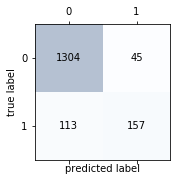

In [11]:
xgb2 = XGBClassifier(
    learning_rate=0.1, 
    max_depth=9, 
    subsample=1,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='error'
)
xgb2.fit(X_train,y_train)
y_pred=xgb2.predict(X_test)
print("Acc.",accuracy_score(y_test, y_pred))
print("Rec.",metrics.recall_score(y_test, y_pred))
Plot_confusion(y_test, y_pred)

Acc. 0.8579369981470043
Rec. 0.6481481481481481


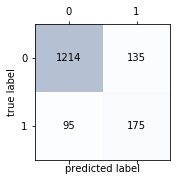

In [12]:
xgb3 = XGBClassifier(
    learning_rate=1, 
    max_depth=2, 
    subsample=0.1,
    colsample_bytree=1,
    objective='binary:logistic',
    eval_metric='error'
)
xgb3.fit(X_train,y_train)
y_pred_2=xgb3.predict(X_test)
print("Acc.",accuracy_score(y_test, y_pred_2))
print("Rec.",metrics.recall_score(y_test, y_pred_2))
Plot_confusion(y_test, y_pred_2)

>透過上述可以看出XGBoost在無任何設定時，就能有一定的預測效果。
><p>本模型透過窮舉搜索找出XGBoost最佳準確度參數，並決定利用xgb2模型預測Test Data</p>